In [1]:
import os
import sys
import re
import math

from matplotlib import pyplot as plt
import numpy as np
#import pandas as pd
#import seaborn as sns

%matplotlib inline
N=5
r = re.compile(r"Batch (\d+), prob = ([^\s]+)")


In [2]:
def _get_log_extension():
    return '.stderr'

In [3]:
def parse_log(log_file):
    probs = []

    with open(log_file) as f:
        last_class = None

        for l in f.readlines():
            matches = r.search(l)

            if matches:
                batch = int(matches.groups()[0])

                if last_class != batch:
                    last_class = batch
                    probs.append([])

                probs[last_class].append(float(matches.groups()[1]))

    # row x col = alignments x probabilities
    return np.asarray(probs)


In [4]:
def parse_log2(log_ile):
    probs = []
    with open(log_file) as f:
        last_class = None
        for l in f.readlines():
            matches = r.search(l)
            if matches:
                batch = int(matches.groups()[0])
                if last_class != batch:
                    last_class = batch
                    probs.append([])
                probs[last_class].append(float(matches.groups()[1]))

    # row x col = alignments x probabilities
    return np.asarray(probs)

def read_test_samples(test_samples_file):
    test_samples=[]
    with open(test_samples_file) as f:
        for l in f.readlines():
            test_samples.append(l.split(" ")[0])
    return test_samples


def select_Top_N(baseline_log,N,test_samples_file):
    topN=[]
    topN_names={}
    matrix = parse_log(baseline_log)
    test_samples=read_test_samples(test_samples_file)
    for i in (range(len(matrix))):
        line=matrix[i]
        topN.append(line.argsort()[::-1][:N])
    
    for i in (range(len(test_samples))):
        topN_names[test_samples[i]]=topN[i]
    return topN_names

In [5]:
input_folder = '/home/antonio/Scrivania/logs'
baseline_log = '/home/antonio/Scrivania/OAR.test_1_aligned_aligned_template.5720165.stderr'
test_samples_file = '/home/antonio/Scrivania/test.txt'
threshold = 0.9

In [6]:
log_files = sorted([i for i in os.listdir(input_folder) if i.endswith(_get_log_extension())])

#cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

NameError: name 'topN_names' is not defined

('Parsing:', 'OAR.test_1_aligned_aligned_01-M-01-C-comp.5719097.stderr')
('TOPN: ', array([ 0, 27, 35, 29, 33]))
[[  1.00000000e+00   4.08357000e-09   2.47759000e-15 ...,   3.51523000e-15
    5.85530000e-16   1.72363000e-13]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]
('\tCorrect class: ', 1)
('\tPredicted Class:', 1)
('Probability:', 1.0)
('Parsing:', 'OAR.test_1_aligned_aligned_01-M-13-D-comp.5719161.stderr')
('TOPN: ', array([12, 31,  1,  2, 37]))
[[  0.00000000e+00   

('Parsing:', 'OAR.test_1_aligned_aligned_02-M-08-D-comp.5719135.stderr')
('TOPN: ', array([ 7, 10,  2,  3,  8]))
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.22885000e-06   8.57313000e-05   3.84993000e-01 ...,   1.02824000e-05
    2.02444000e-05   1.39375000e-07]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]
('\tCorrect class: ', 8)
('\tPredicted Class:', 4)
('Probability:', 0.99915699999999996)
('Parsing:', 'OAR.test_1_aligned_aligned_02-M-10-D-comp.5719146.stderr')
('TOPN: ', array([11,  2,  1,  0,  9]))
[[  3

('Parsing:', 'OAR.test_1_aligned_aligned_03-M-06-D-comp.5719125.stderr')
('TOPN: ', array([ 5,  4,  8, 15, 10]))
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
('\tCorrect class: ', 6)
('\tPredicted Class:', 6)
('Probability:', 1.0)
('Parsing:', 'OAR.test_1_aligned_aligned_03-M-09-C-comp.5719141.stderr')
('TOPN: ', array([10,  8, 26, 25, 11]))
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
('\tCorrect class: ', 9)
('\tPredicted Class:', 9)
('Probability:', 1.0)
('Parsing:', 'OAR.test_1_aligned_aligned_03-M-10-C-comp.5719147.stderr')
('TOPN: ', array([10,  8, 26, 25,  3]))
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0

('Parsing:', 'OAR.test_1_aligned_aligned_04-M-10-D-comp.5719149.stderr')
('TOPN: ', array([ 9, 11, 19,  0, 20]))
[[  4.44701000e-05   1.52718000e-06   3.90548000e-11 ...,   5.35714000e-11
    2.30188000e-11   1.87707000e-11]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]
('\tCorrect class: ', 10)
('\tPredicted Class:', 10)
('Probability:', 0.99991399999999997)
('Parsing:', 'OAR.test_1_aligned_aligned_04-M-19-C-comp.5719196.stderr')
('TOPN: ', array([19, 18, 20, 37, 41]))
[[ 

('Parsing:', 'OAR.test_1_aligned_aligned_05-M-28-D-comp.5719247.stderr')
('TOPN: ', array([27, 38, 28, 36, 34]))
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
('\tCorrect class: ', 28)
('\tPredicted Class:', 28)
('Probability:', 0.99931700000000001)
('Parsing:', 'OAR.test_1_aligned_aligned_05-M-29-C-comp.5719254.stderr')
('TOPN: ', array([28, 34, 38,  1, 27]))
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  6.00378000e-02   6.88207000e-01   5.20252000e-05 ...,   4.73866000e-07
    9.04501000e-08   6.35803000e-07]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000

('Parsing:', 'OAR.test_1_aligned_aligned_06-M-06-C-comp.5719127.stderr')
('TOPN: ', array([ 5, 10,  4,  8, 26]))
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
('\tCorrect class: ', 6)
('\tPredicted Class:', 6)
('Probability:', 1.0)
('Parsing:', 'OAR.test_1_aligned_aligned_06-M-09-C-comp.5719142.stderr')
('TOPN: ', array([ 8,  3, 10,  9,  6]))
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
('\tCorrect class: ', 9)
('\tPredicted Class:', 9)
('Probability:', 0.99999300000000002)
('Parsing:', 'OAR.test_1_aligned_aligned_06-M-11-D-comp.5719152.stderr')
('TOPN: ', array([10,  8, 11,  3,  5]))
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..

('Parsing:', 'OAR.test_1_aligned_aligned_06-M-33-C-comp.5719276.stderr')
('TOPN: ', array([32, 16, 33, 17, 35]))
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
('\tCorrect class: ', 33)
('\tPredicted Class:', 33)
('Probability:', 0.99975899999999995)
('Parsing:', 'OAR.test_1_aligned_aligned_06-M-36-D-comp.5719294.stderr')
('TOPN: ', array([35, 42,  0, 28, 19]))
[[  9.99802000e-01   7.85982000e-09   1.55463000e-12 ...,   1.05699000e-11
    4.78327000e-12   6.71091000e-08]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000

('Parsing:', 'OAR.test_1_aligned_aligned_08-M-05-D-comp.5719122.stderr')
('TOPN: ', array([ 5,  4, 26, 10,  8]))
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
('\tCorrect class: ', 5)
('\tPredicted Class:', 5)
('Probability:', 0.999996)
('Parsing:', 'OAR.test_1_aligned_aligned_08-M-07-C-comp.5719131.stderr')
('TOPN: ', array([ 6,  1,  2, 15,  7]))
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  4.14534000e-05   7.97952000e-03   8.40988000e-01 ...,   5.04967000e-06
    8.74603000e-06   5.81848000e-07]
 [  1.42941000e-05   1.17282000e-03   6.38526000e-01 ...,   2.78328000e-05
    2.58641000e-04   2.47812000e-06]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.0

('Parsing:', 'OAR.test_1_aligned_aligned_08-M-36-D-comp.5719296.stderr')
('TOPN: ', array([35, 27,  0, 29, 42]))
[[  9.65966000e-01   2.33932000e-04   3.25711000e-08 ...,   2.26854000e-08
    1.05634000e-08   1.17224000e-07]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  8.78926000e-07   7.04962000e-08   1.19336000e-06 ...,   2.07337000e-07
    1.24924000e-06   1.86522000e-05]]
('\tCorrect class: ', 36)
('\tPredicted Class:', 36)
('Probability:', 0.99583500000000003)
('Parsing:', 'OAR.test_1_aligned_aligned_08-M-37-D-comp.5719298.stderr')
('TOPN: ', array([37, 38, 36, 12, 16]))
[[ 

('Parsing:', 'OAR.test_1_aligned_aligned_09-M-18-D-comp.5719193.stderr')
('TOPN: ', array([17, 32, 20, 13, 28]))
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
('\tCorrect class: ', 18)
('\tPredicted Class:', 14)
('Probability:', 0.99929599999999996)
('Parsing:', 'OAR.test_1_aligned_aligned_09-M-20-D-comp.5719203.stderr')
('TOPN: ', array([19, 18, 20, 35,  9]))
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
('\tCorrect class: ', 20)
('\tPredicted Class:', 20)
('Probability:', 0.99997999999999998)
('Parsing:', 'OAR.test_1_aligned_aligned_09-M-22-D-comp.5719214.stderr')
('TOPN: ', array([21, 24, 22, 23, 25]))
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. .

('Parsing:', 'OAR.test_1_aligned_aligned_10-M-05-D-comp.5719123.stderr')
('TOPN: ', array([ 4,  5, 11,  3,  9]))
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
('\tCorrect class: ', 5)
('\tPredicted Class:', 6)
('Probability:', 0.99984700000000004)
('Parsing:', 'OAR.test_1_aligned_aligned_10-M-06-D-comp.5719129.stderr')
('TOPN: ', array([ 5, 10,  4, 26,  3]))
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
('\tCorrect class: ', 6)
('\tPredicted Class:', 5)
('Probability:', 0.99998299999999996)
('Parsing:', 'OAR.test_1_aligned_aligned_10-M-08-C-comp.5719138.stderr')
('TOPN: ', array([ 7,  6, 19, 18,  9]))
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ..., 

('Parsing:', 'OAR.test_1_aligned_aligned_10-M-42-C-comp.5719328.stderr')
('TOPN: ', array([41, 38, 39, 40, 36]))
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  4.99383000e-10   1.15253000e-09   4.78482000e-08 ...,   3.21407000e-06
    9.99985000e-01   7.29194000e-07]
 [  2.28079000e-09   7.91402000e-09   9.25915000e-07 ...,   1.36516000e-05
    9.99884000e-01   1.45174000e-06]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]
('\tCorrect class: ', 42)
('\tPredicted Class:', 42)
('Probability:', 0.999884)
('Parsing:', 'OAR.test_1_aligned_aligned_11-M-02-C-comp.5719106.stderr')
('TOPN: ', array([ 1,  2, 12,  6, 18]))
[[  0.00000000

('Parsing:', 'OAR.test_1_aligned_aligned_11-M-22-C-comp.5719216.stderr')
('TOPN: ', array([21, 22, 31, 25, 14]))
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
('\tCorrect class: ', 22)
('\tPredicted Class:', 22)
('Probability:', 0.99997800000000003)
('Parsing:', 'OAR.test_1_aligned_aligned_11-M-25-C-comp.5719230.stderr')
('TOPN: ', array([24, 27, 22, 23, 31]))
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
('\tCorrect class: ', 25)
('\tPredicted Class:', 25)
('Probability:', 0.99997599999999998)
('Parsing:', 'OAR.test_1_aligned_aligned_11-M-27-C-comp.5719244.stderr')
('TOPN: ', array([26, 25, 21,  3, 10]))
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. .

('Parsing:', 'OAR.test_1_aligned_aligned_12-M-21-D-comp.5719211.stderr')
('TOPN: ', array([18, 20,  7,  1, 19]))
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  4.42316000e-05   1.22142000e-04   4.35661000e-05 ...,   1.27431000e-07
    2.09909000e-07   1.25743000e-07]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]
('\tCorrect class: ', 21)
('\tPredicted Class:', 8)
('Probability:', 0.877108)
('Parsing:', 'OAR.test_1_aligned_aligned_12-M-24-C-comp.5719228.stderr')
('TOPN: ', array([23, 26,  0, 24, 21]))
[[  1.11264000e

('Parsing:', 'OAR.test_1_aligned_aligned_13-M-15-C-comp.5719176.stderr')
('TOPN: ', array([14, 37, 18, 31, 38]))
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
('\tCorrect class: ', 15)
('\tPredicted Class:', 39)
('Probability:', 0.99868000000000001)
('Parsing:', 'OAR.test_1_aligned_aligned_13-M-17-D-comp.5719189.stderr')
('TOPN: ', array([16,  7,  8, 32, 15]))
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
('\tCorrect class: ', 17)
('\tPredicted Class:', 17)
('Probability:', 0.99999800000000005)
('Parsing:', 'OAR.test_1_aligned_aligned_13-M-20-D-comp.5719205.stderr')
('TOPN: ', array([18, 20, 19, 35, 28]))
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. .

('Parsing:', 'OAR.test_1_aligned_aligned_14-M-07-D-comp.5719134.stderr')
('TOPN: ', array([ 6,  1, 21,  7,  2]))
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  4.22875000e-07   7.80322000e-04   4.63821000e-09 ...,   3.81515000e-13
    1.12253000e-13   1.34255000e-12]
 [  6.71598000e-07   2.11153000e-05   9.51186000e-03 ...,   4.01552000e-08
    3.29894000e-07   1.28334000e-09]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]
('\tCorrect class: ', 7)
('\tPredicted Class:', 7)
('Probability:', 0.99917500000000004)
('Parsing:', 'OAR.test_1_aligned_aligned_14-M-08-D-comp.5719140.stderr')
('TOPN: ', array([ 7,  6, 22, 21,  2]))
[[  0

('Parsing:', 'OAR.test_1_aligned_aligned_14-M-37-C-comp.5719302.stderr')
('TOPN: ', array([36, 38, 30, 16, 27]))
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
('\tCorrect class: ', 37)
('\tPredicted Class:', 37)
('Probability:', 0.99980800000000003)
('Parsing:', 'OAR.test_1_aligned_aligned_14-M-38-C-comp.5719307.stderr')
('TOPN: ', array([37, 38, 18, 41, 19]))
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.31845000e-13   7.69251

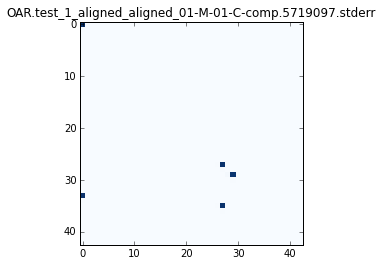

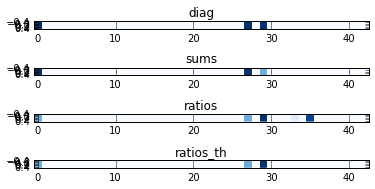

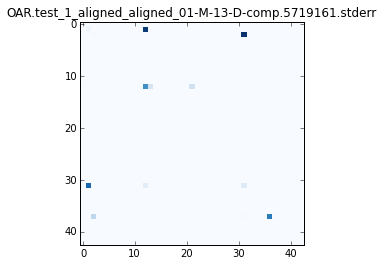

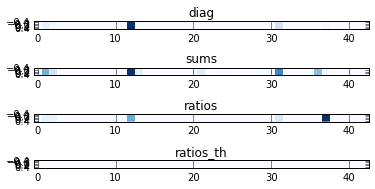

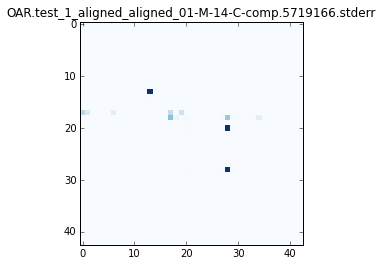

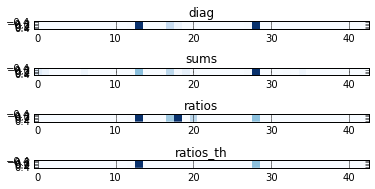

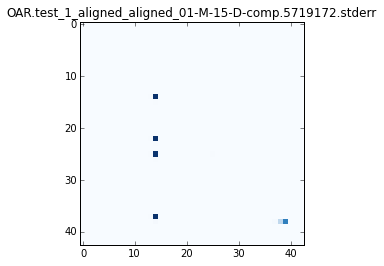

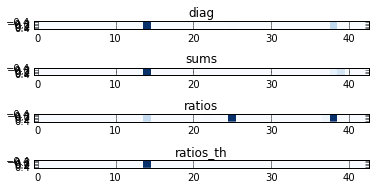

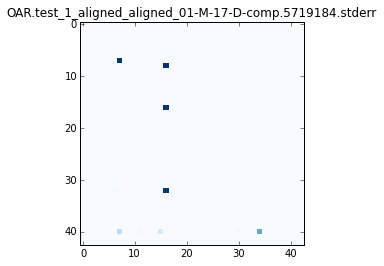

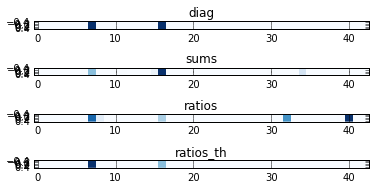

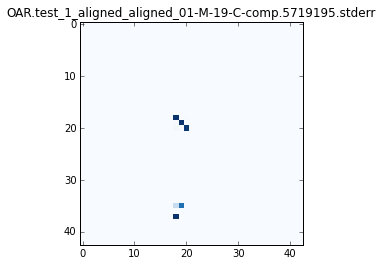

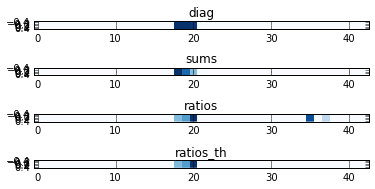

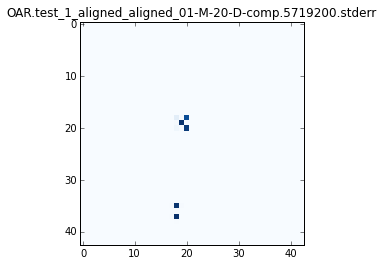

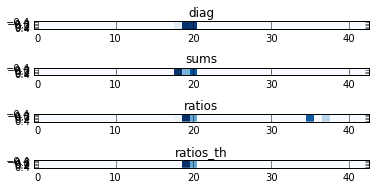

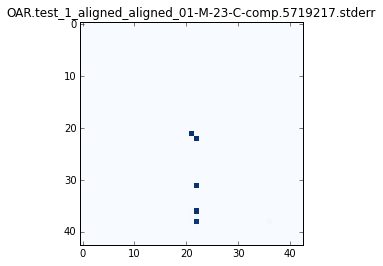

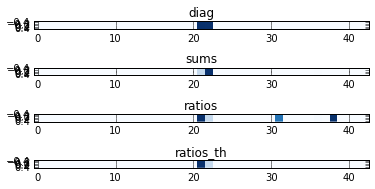

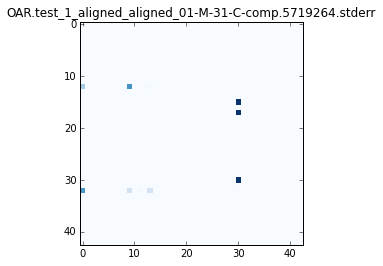

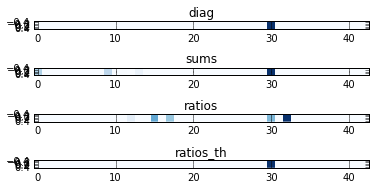

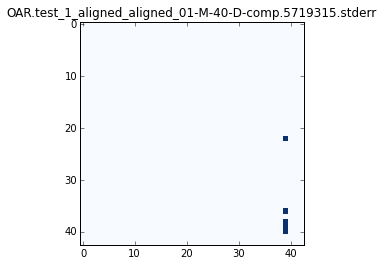

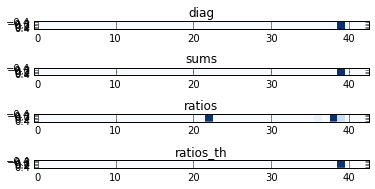

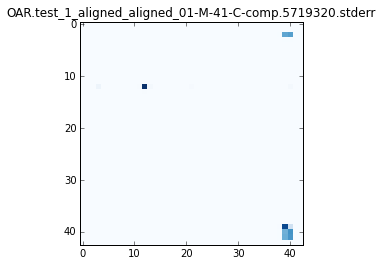

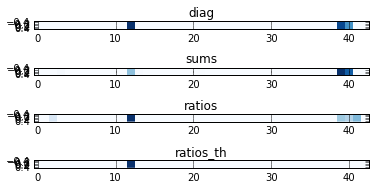

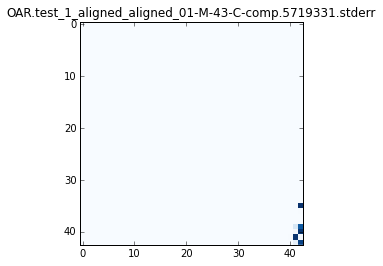

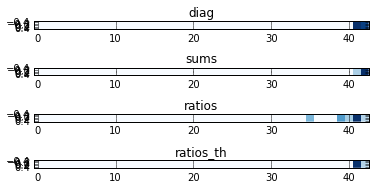

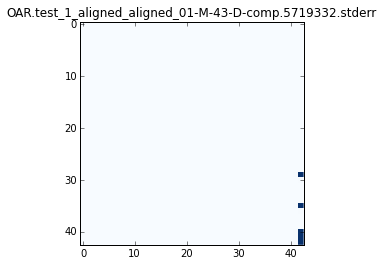

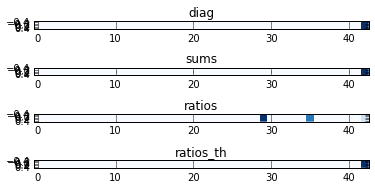

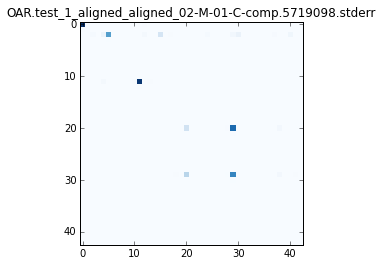

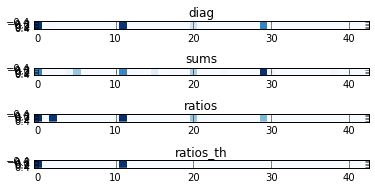

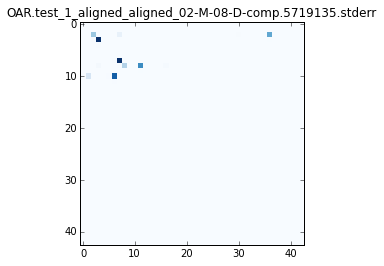

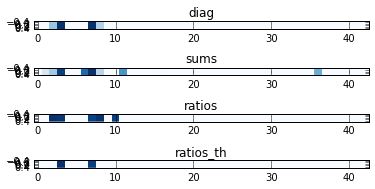

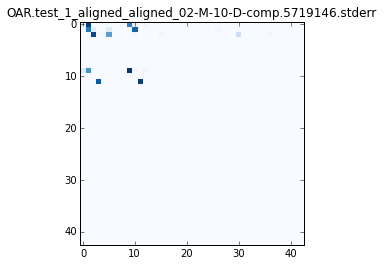

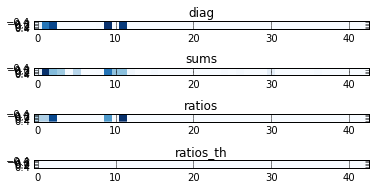

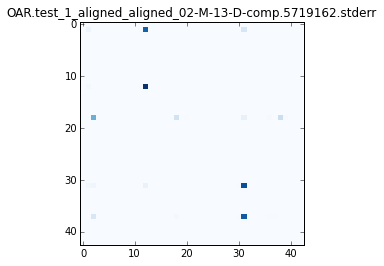

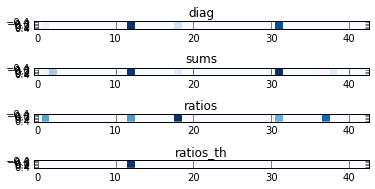

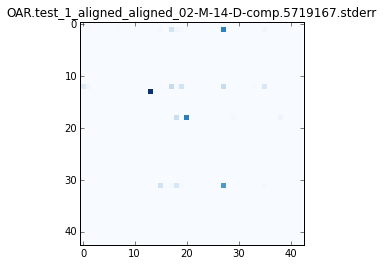

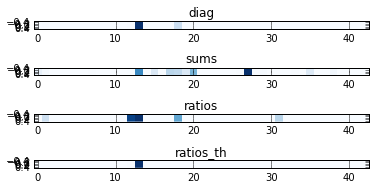

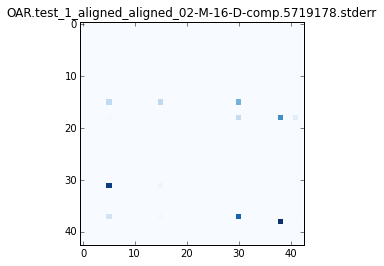

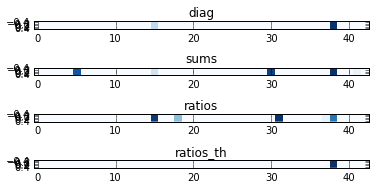

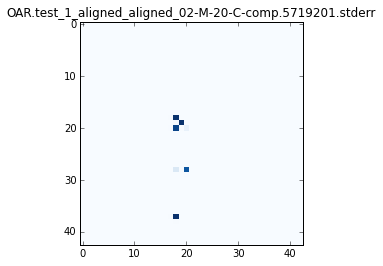

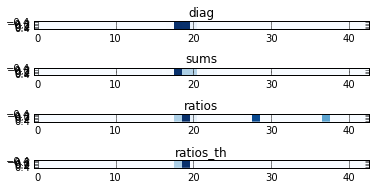

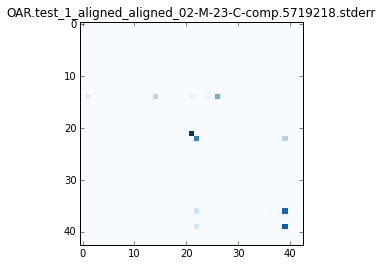

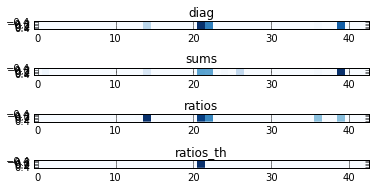

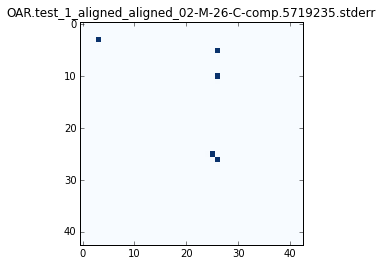

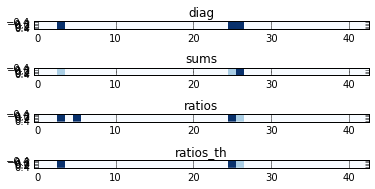

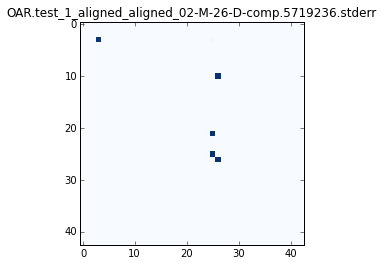

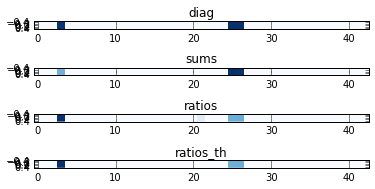

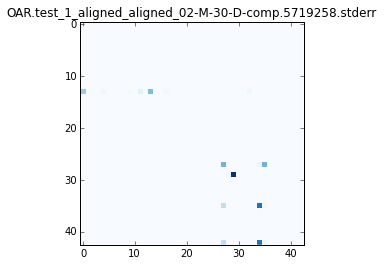

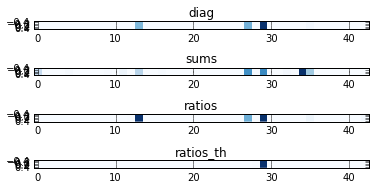

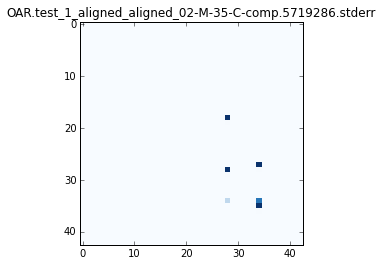

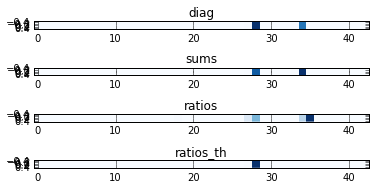

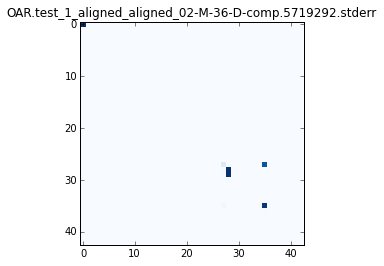

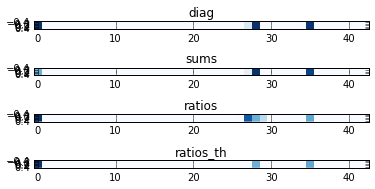

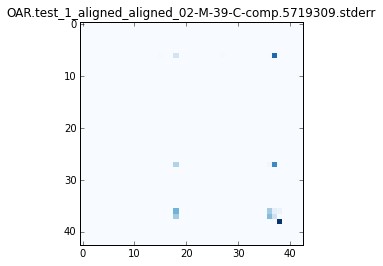

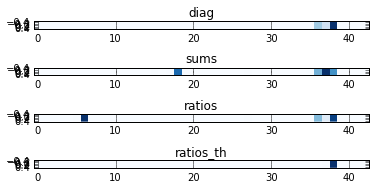

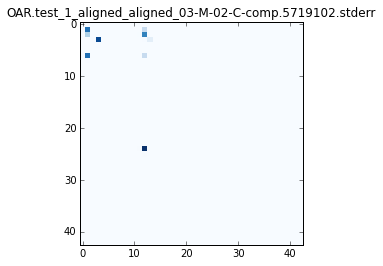

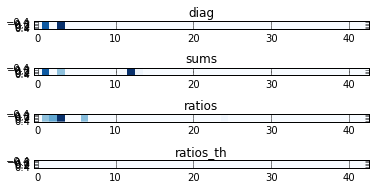

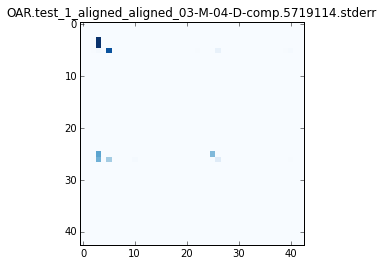

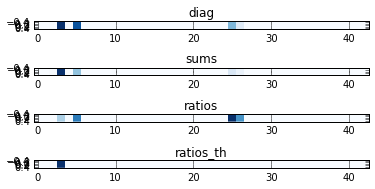

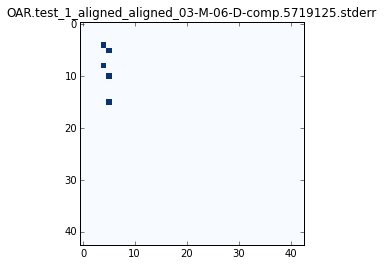

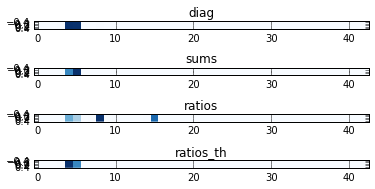

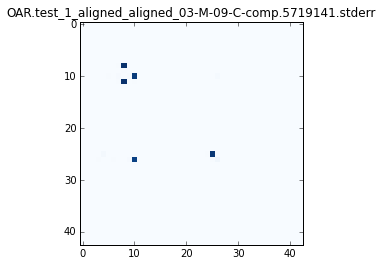

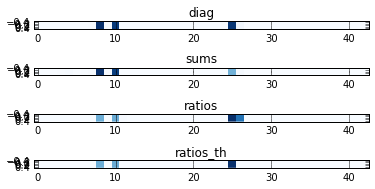

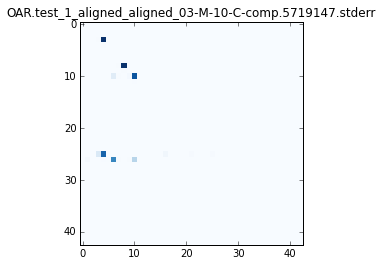

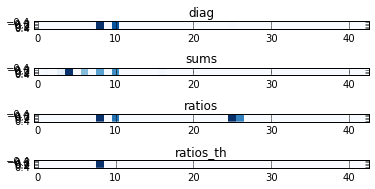

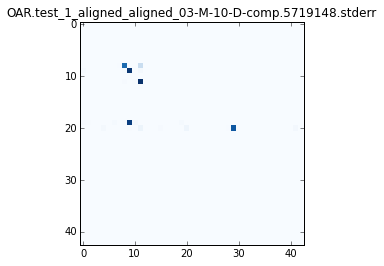

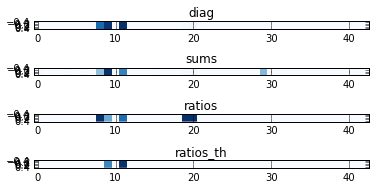

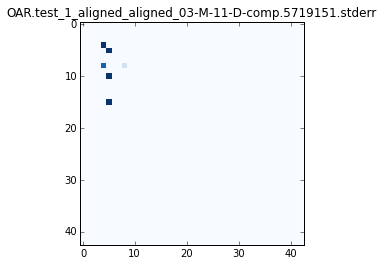

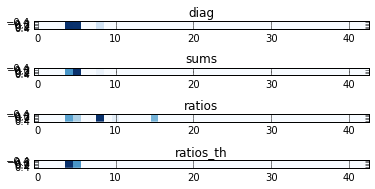

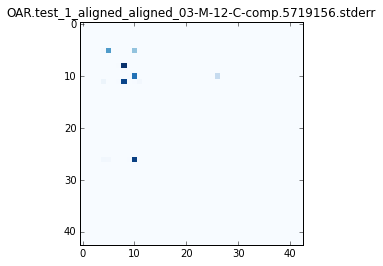

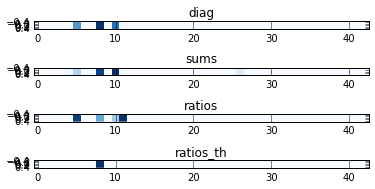

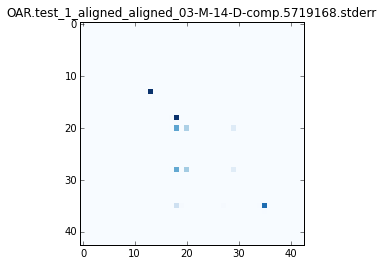

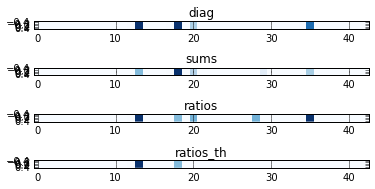

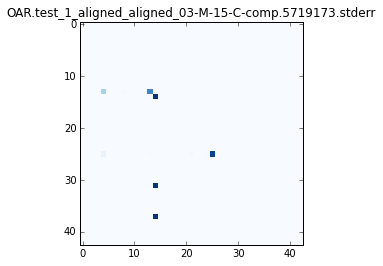

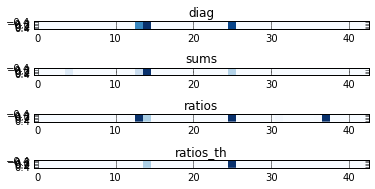

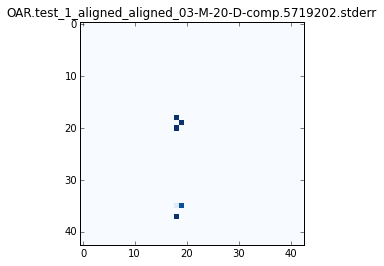

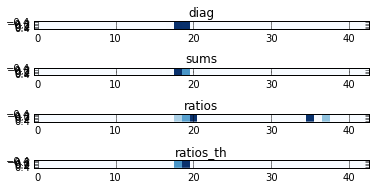

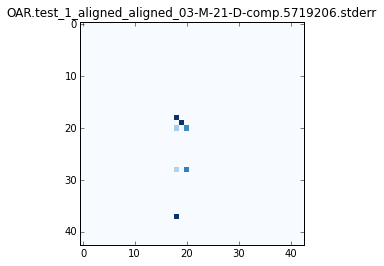

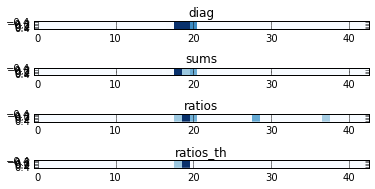

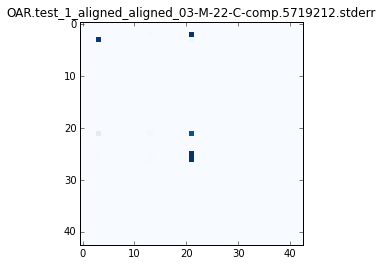

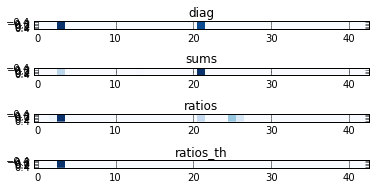

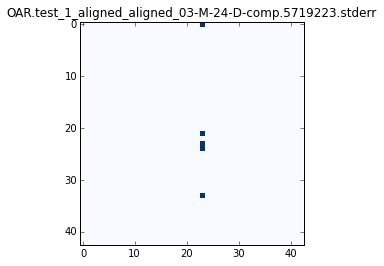

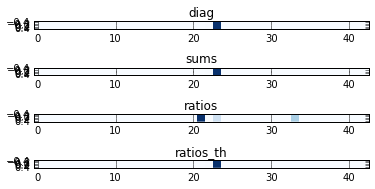

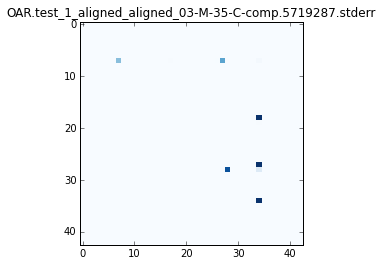

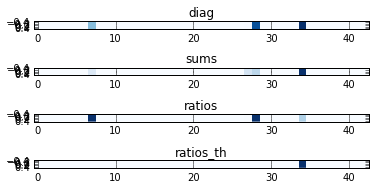

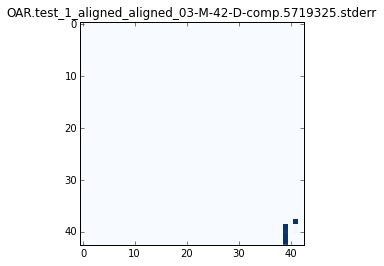

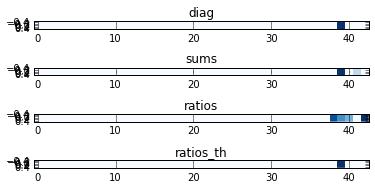

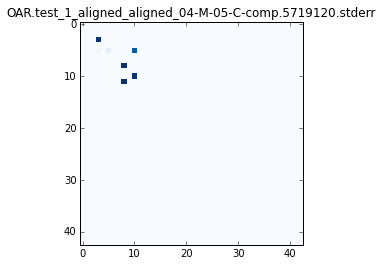

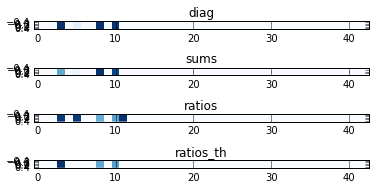

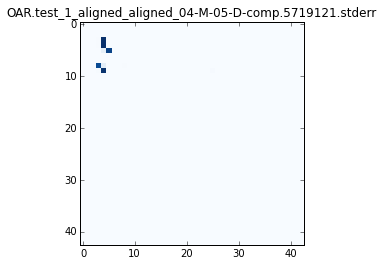

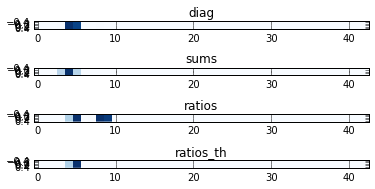

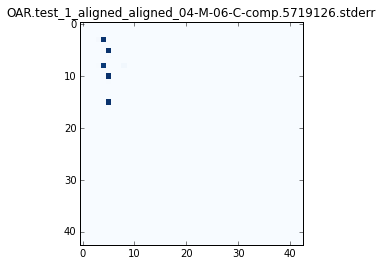

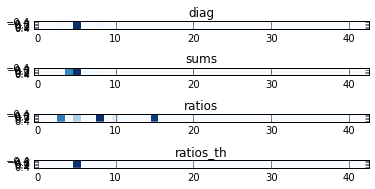

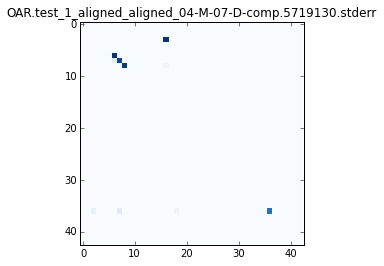

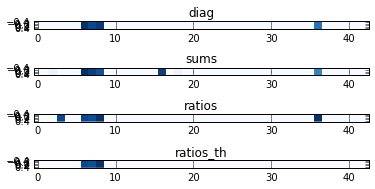

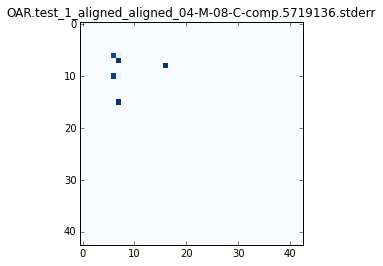

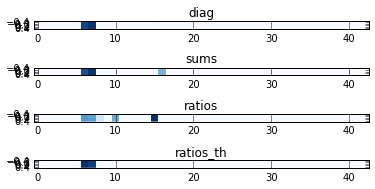

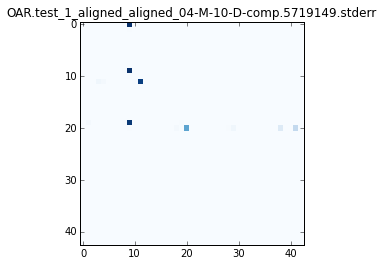

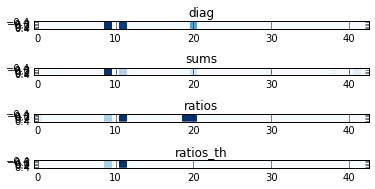

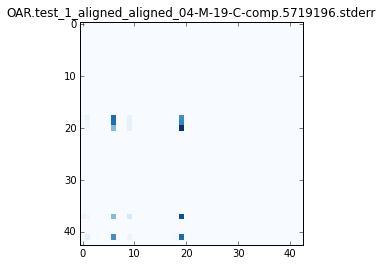

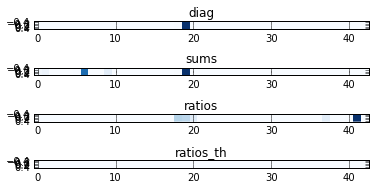

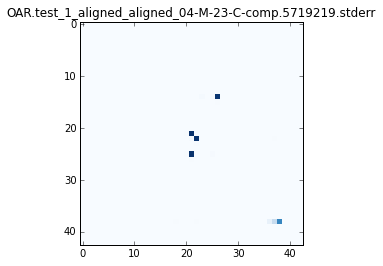

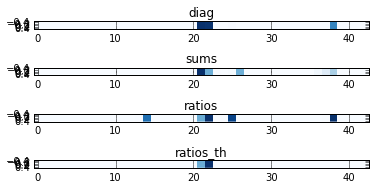

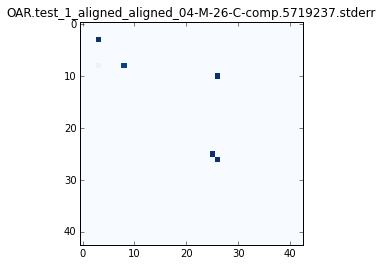

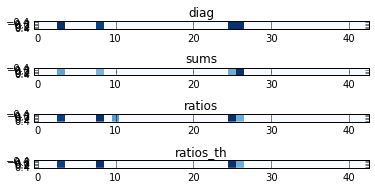

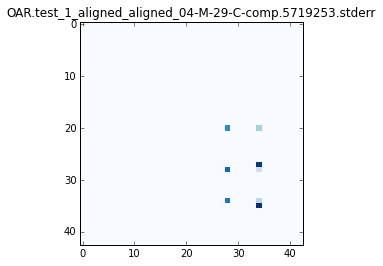

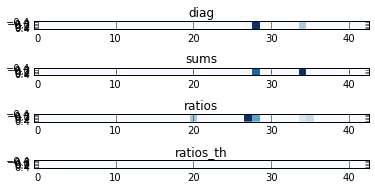

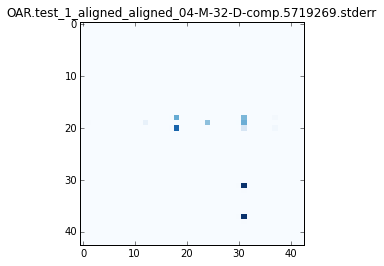

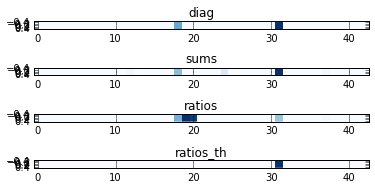

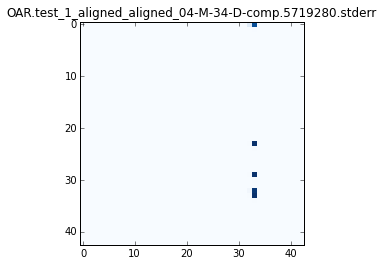

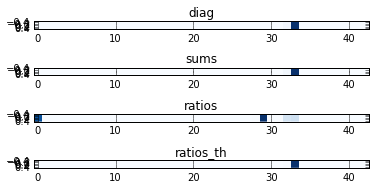

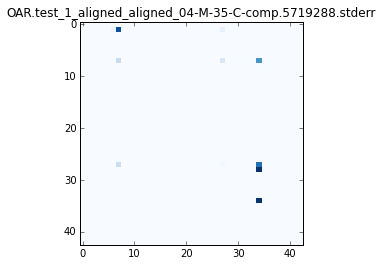

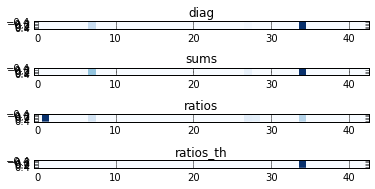

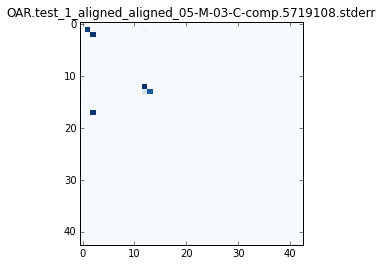

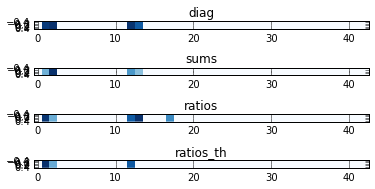

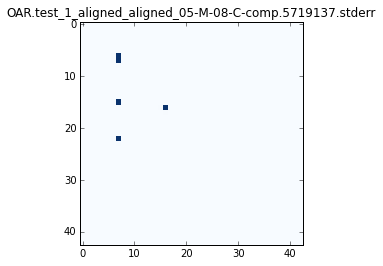

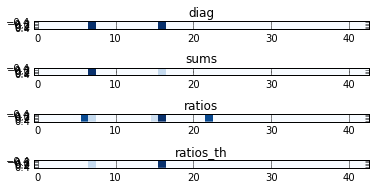

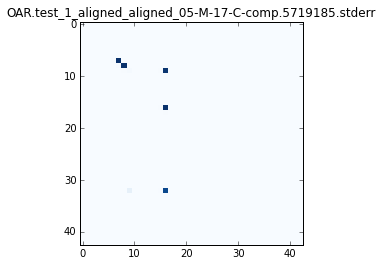

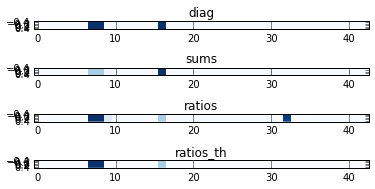

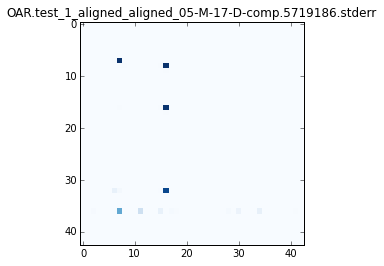

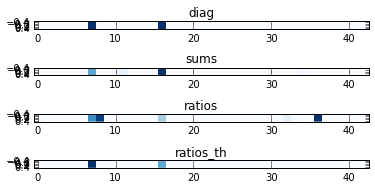

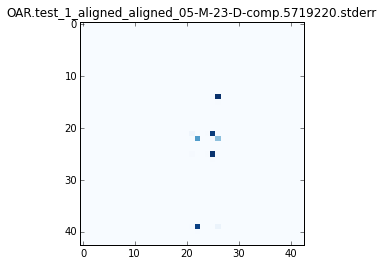

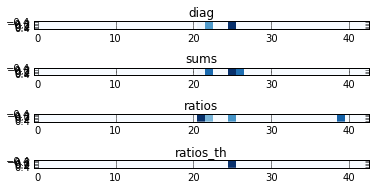

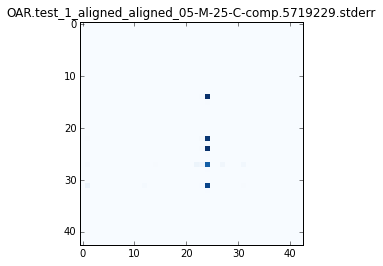

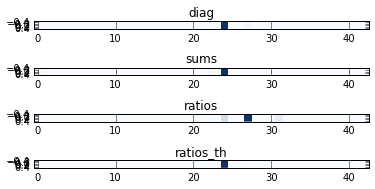

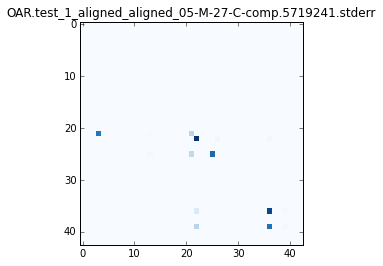

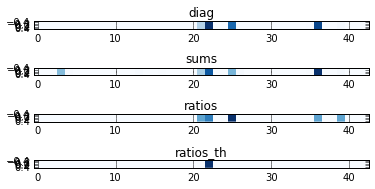

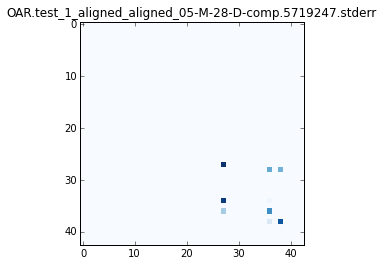

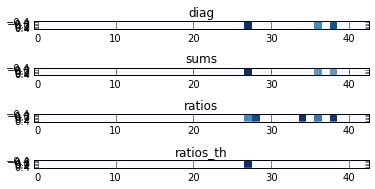

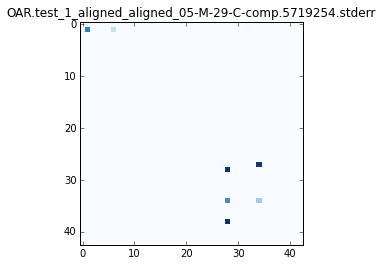

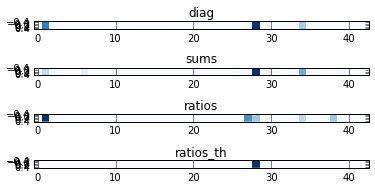

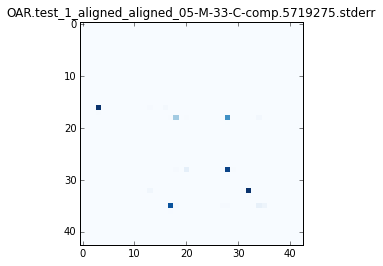

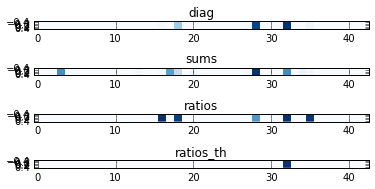

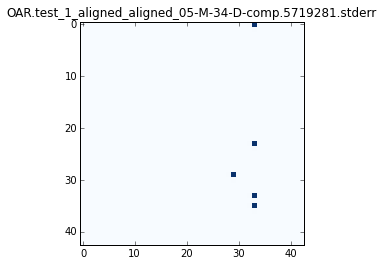

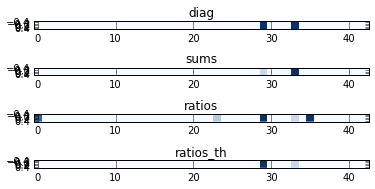

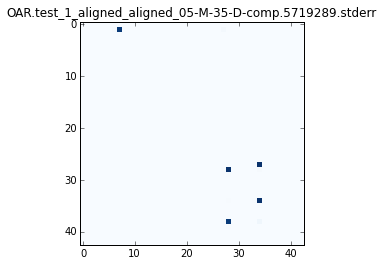

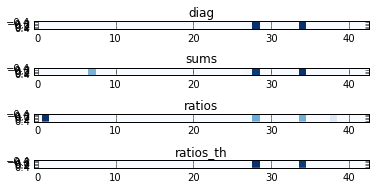

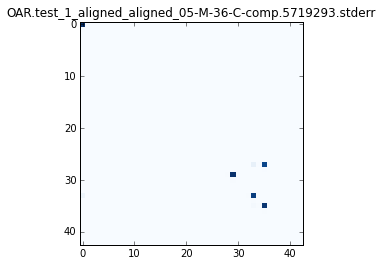

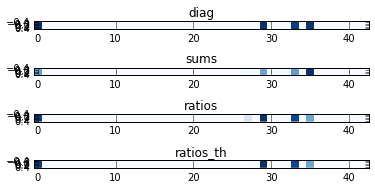

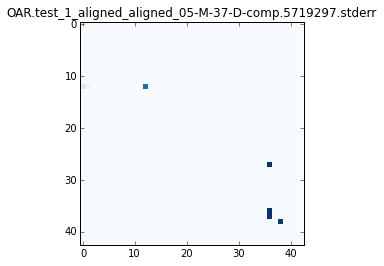

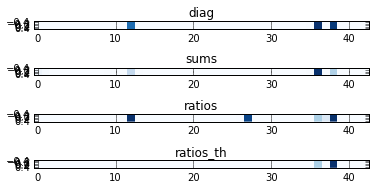

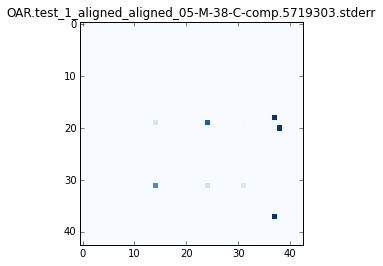

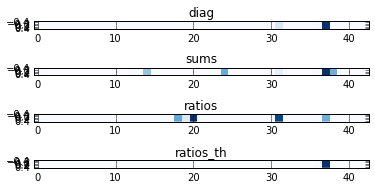

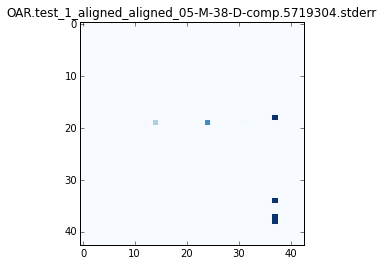

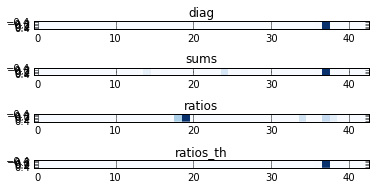

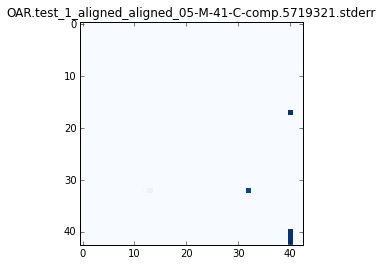

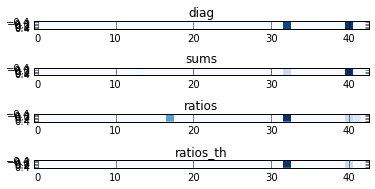

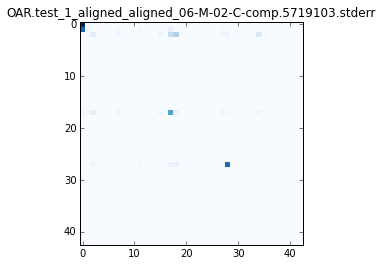

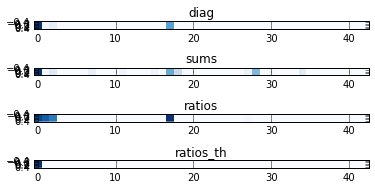

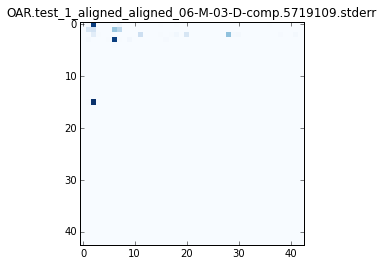

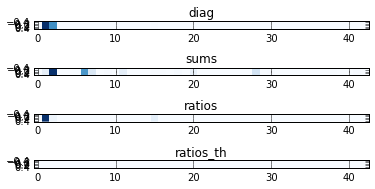

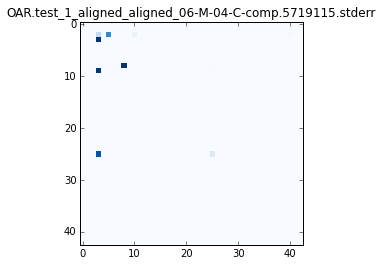

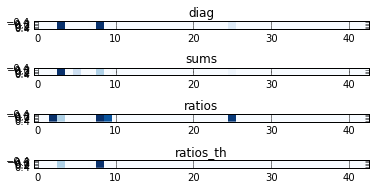

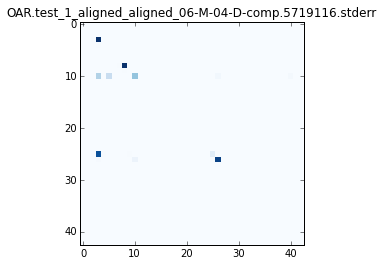

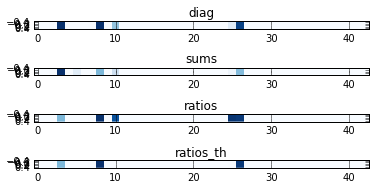

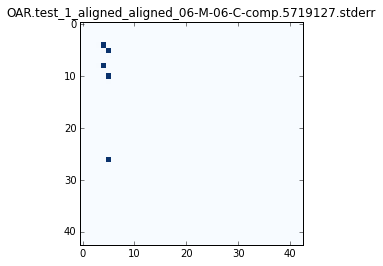

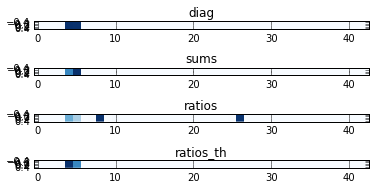

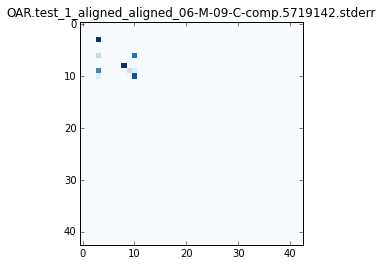

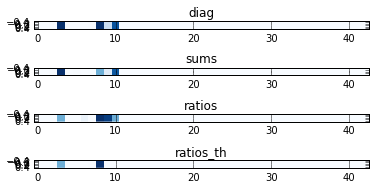

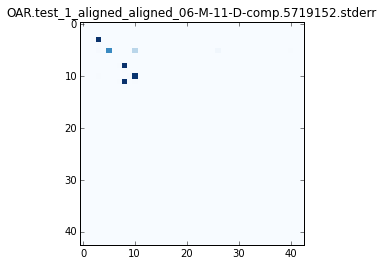

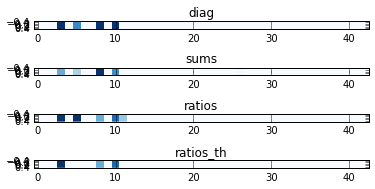

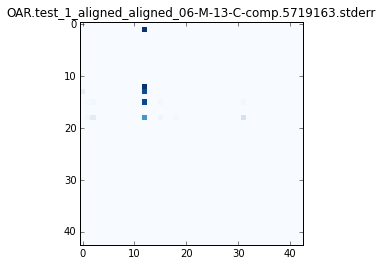

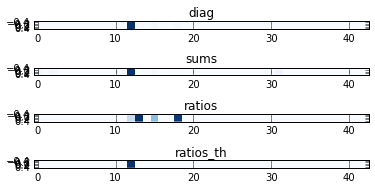

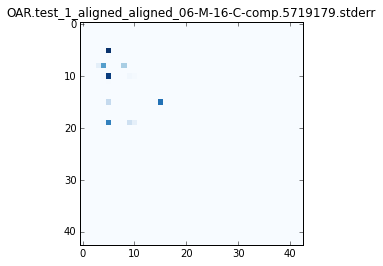

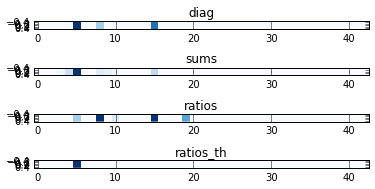

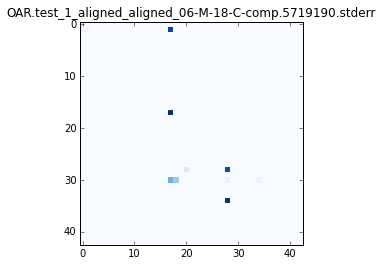

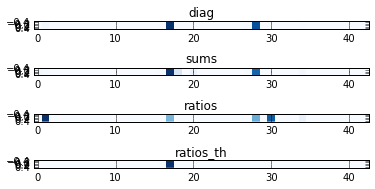

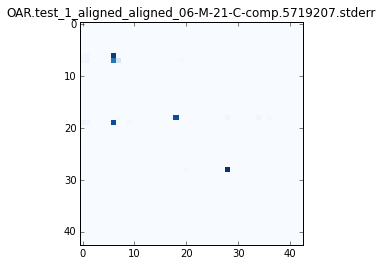

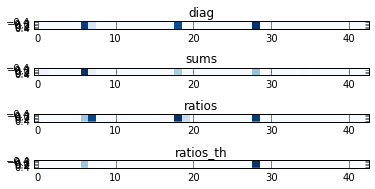

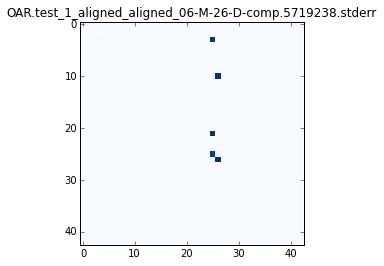

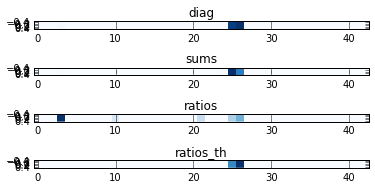

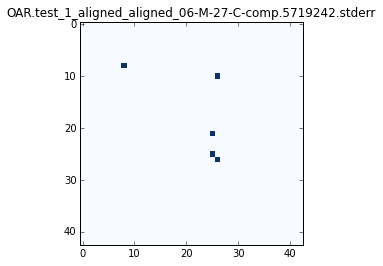

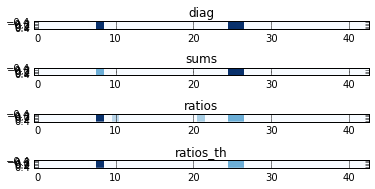

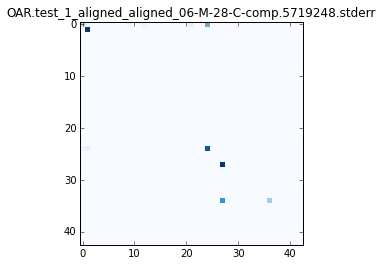

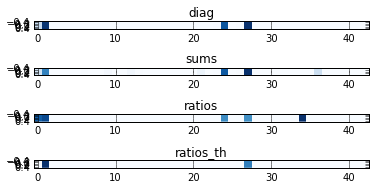

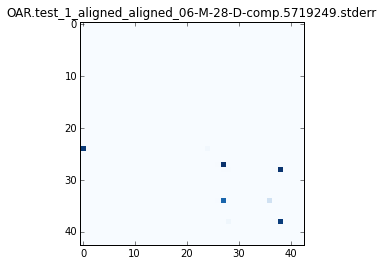

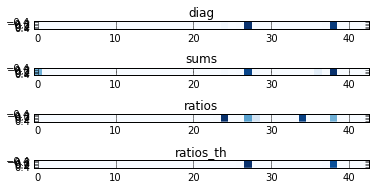

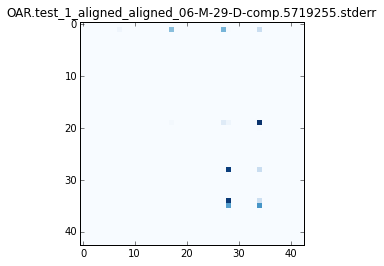

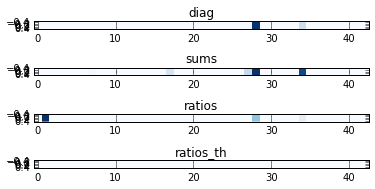

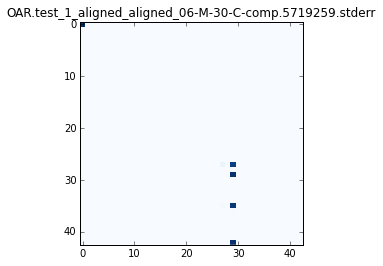

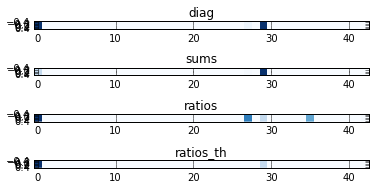

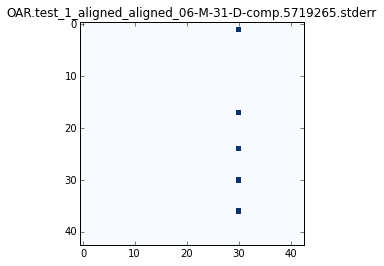

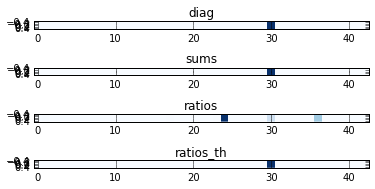

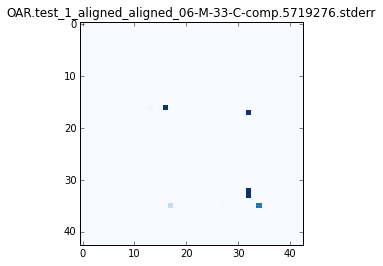

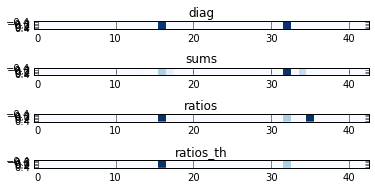

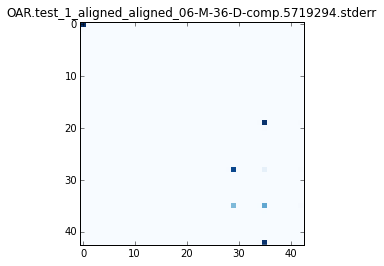

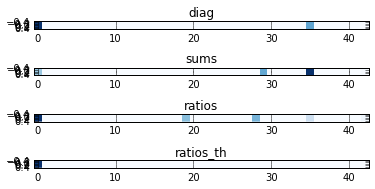

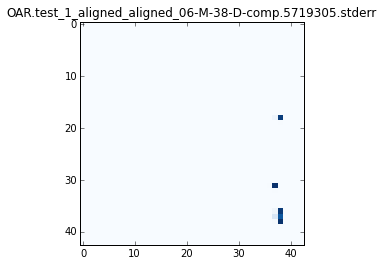

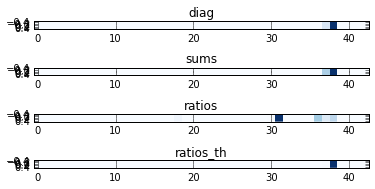

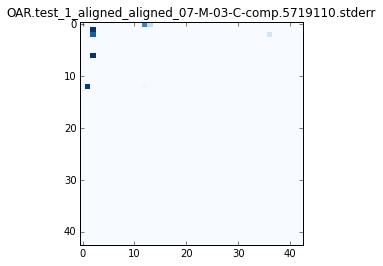

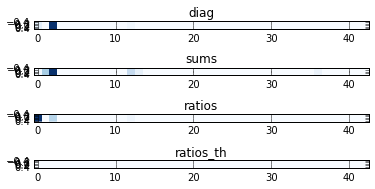

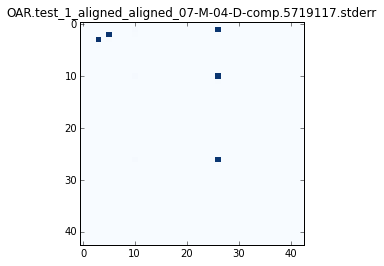

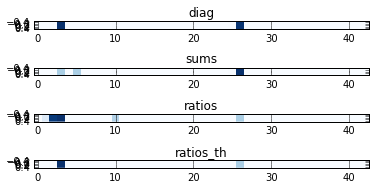

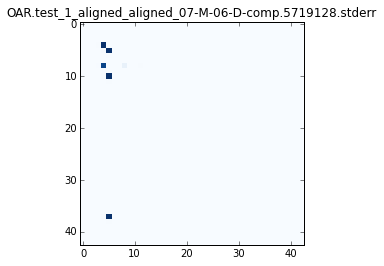

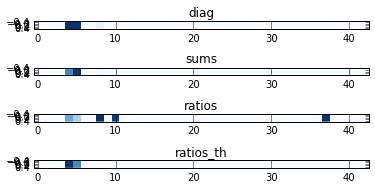

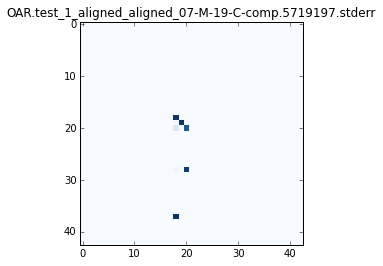

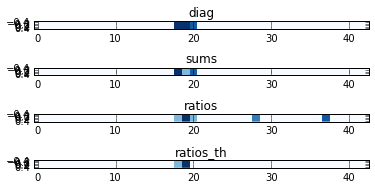

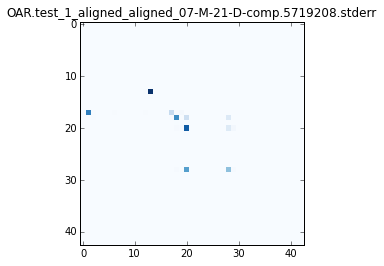

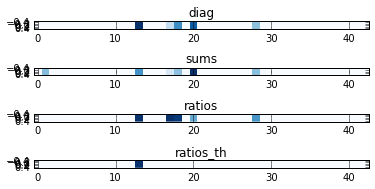

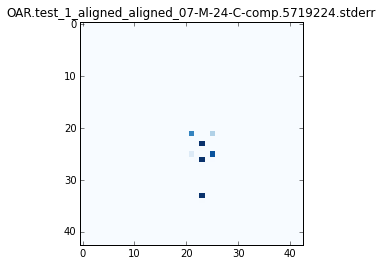

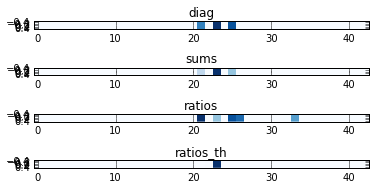

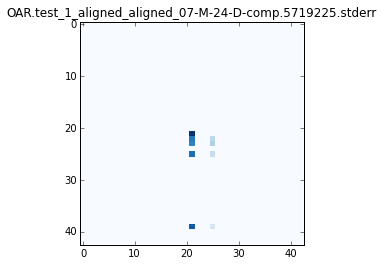

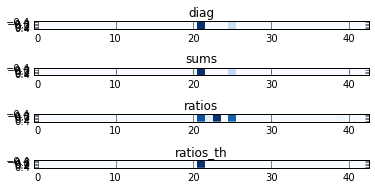

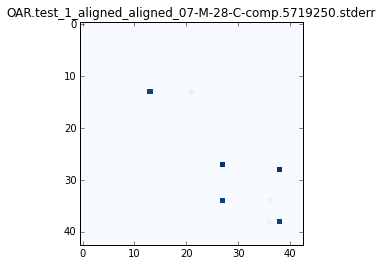

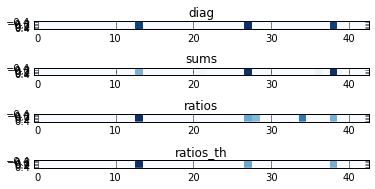

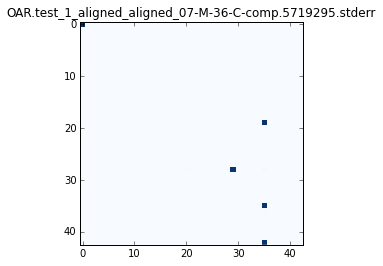

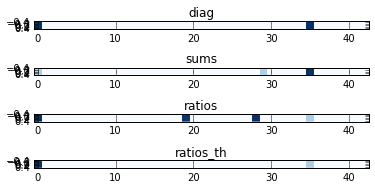

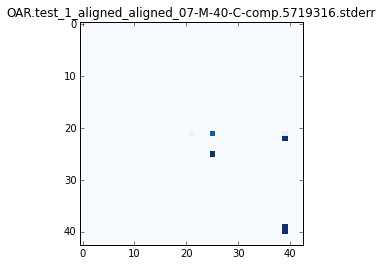

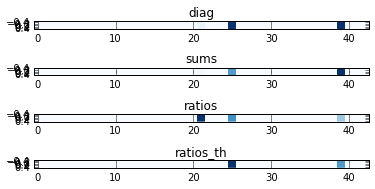

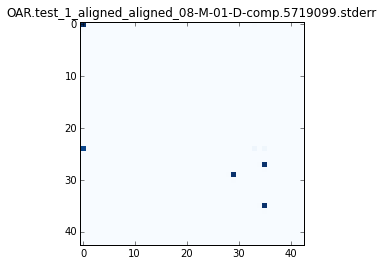

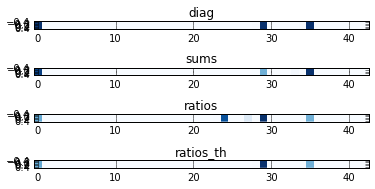

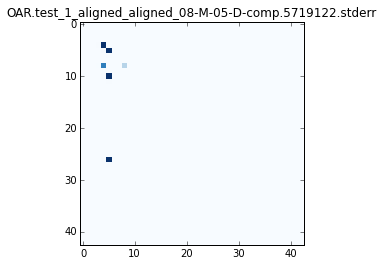

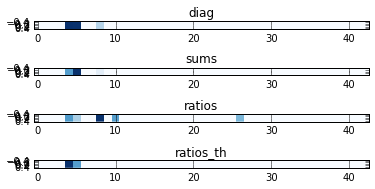

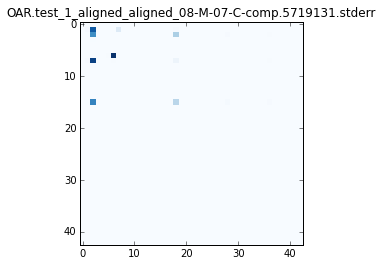

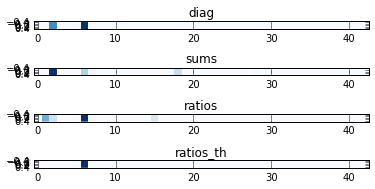

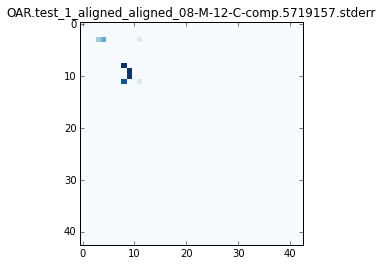

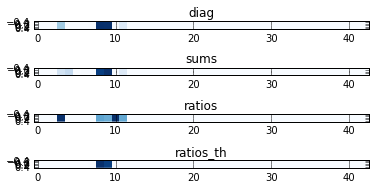

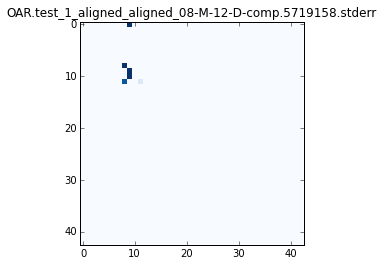

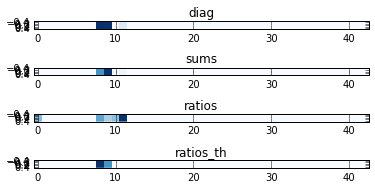

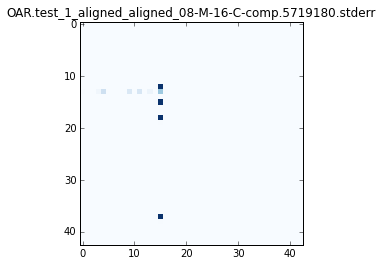

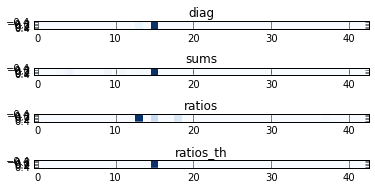

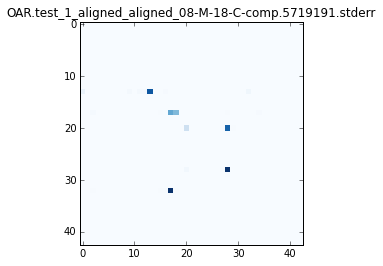

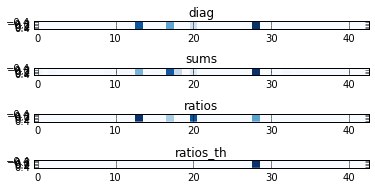

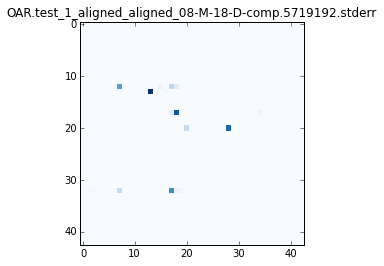

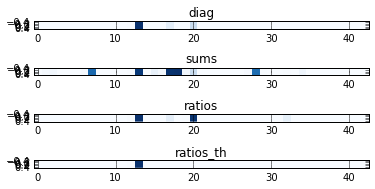

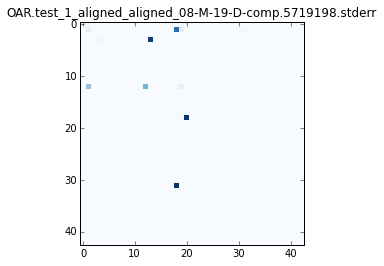

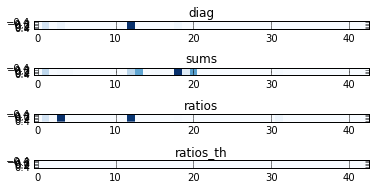

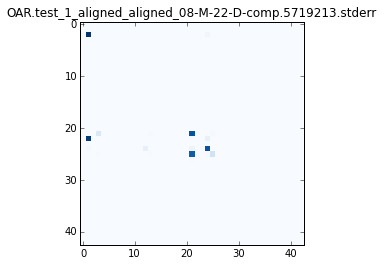

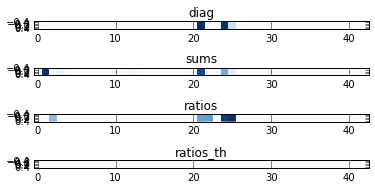

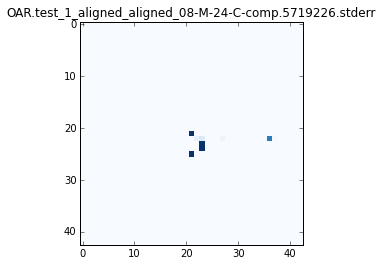

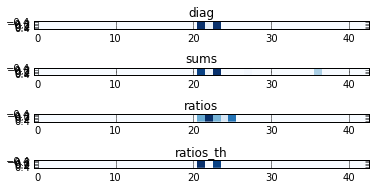

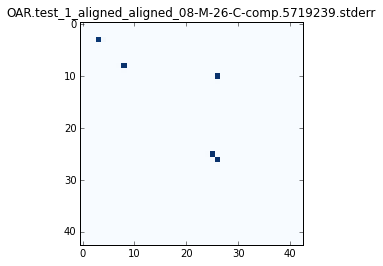

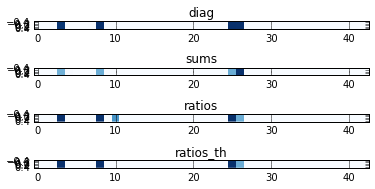

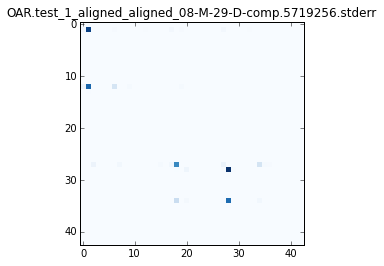

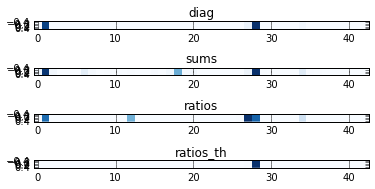

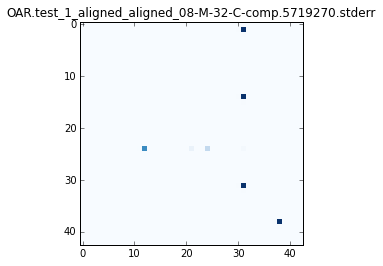

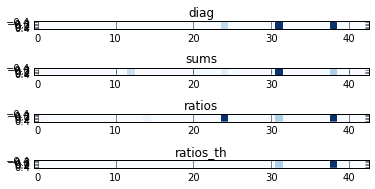

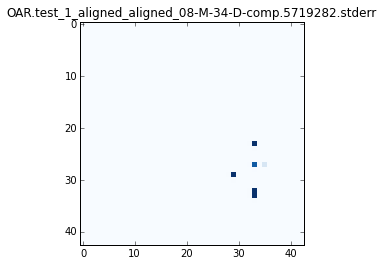

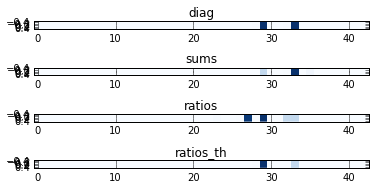

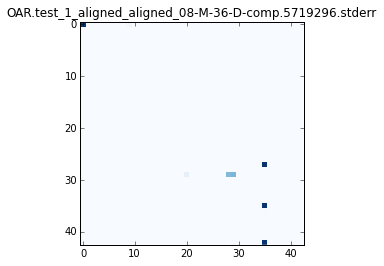

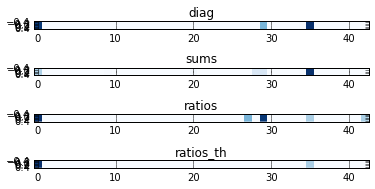

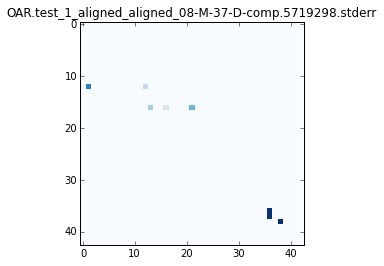

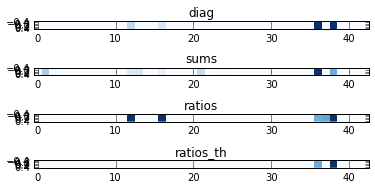

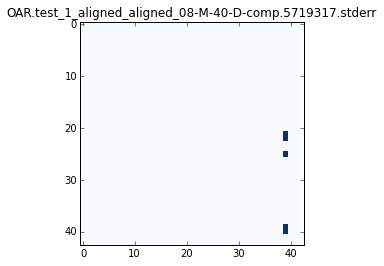

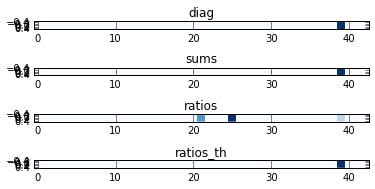

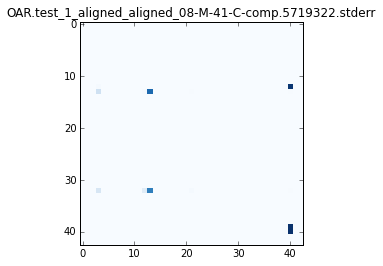

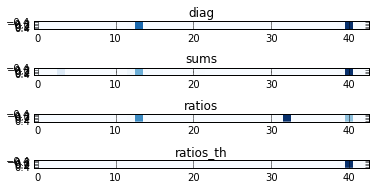

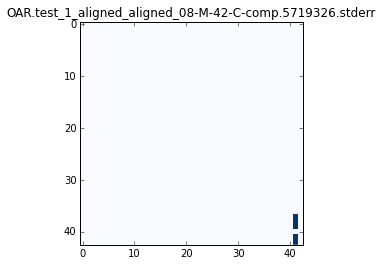

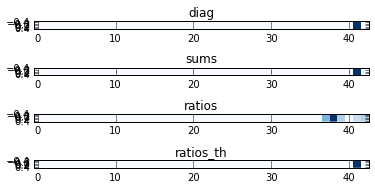

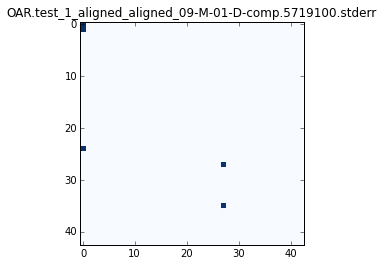

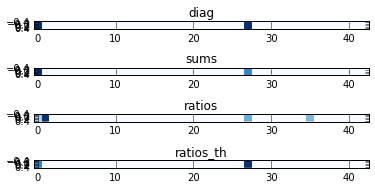

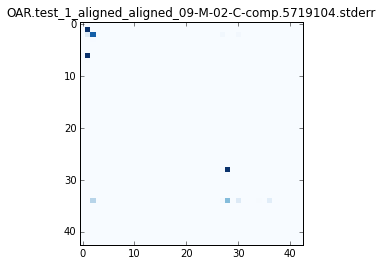

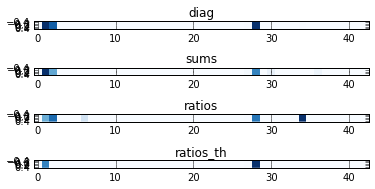

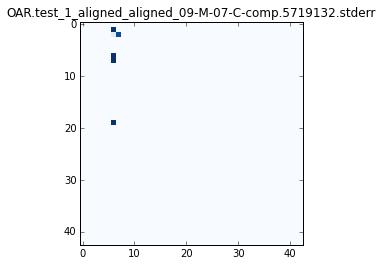

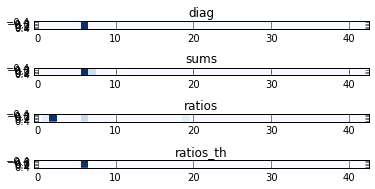

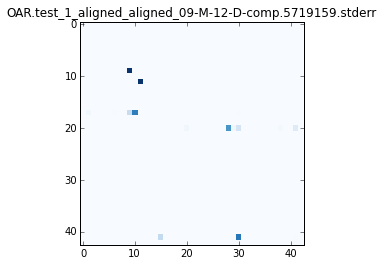

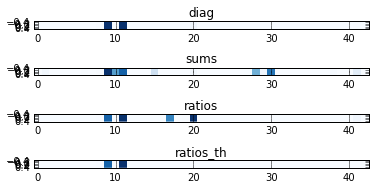

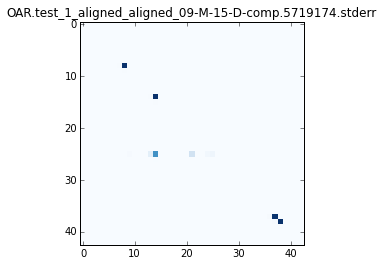

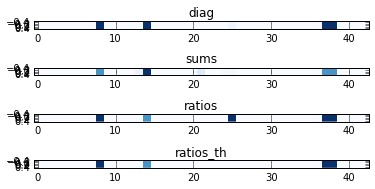

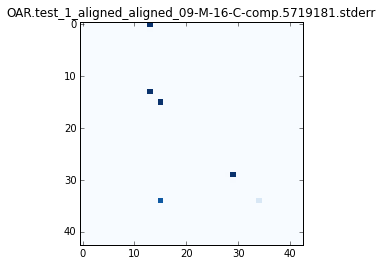

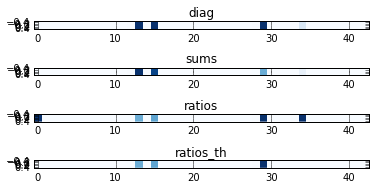

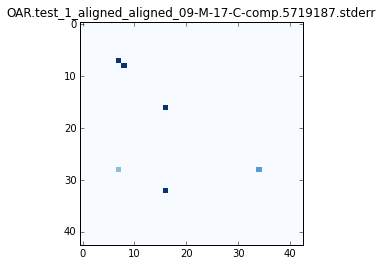

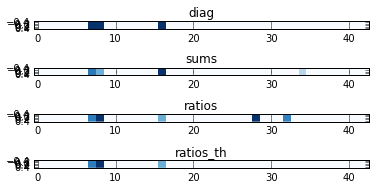

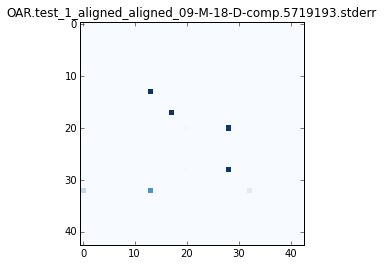

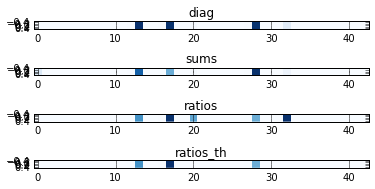

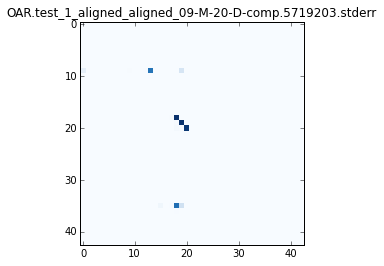

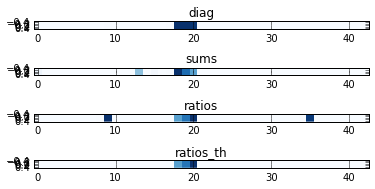

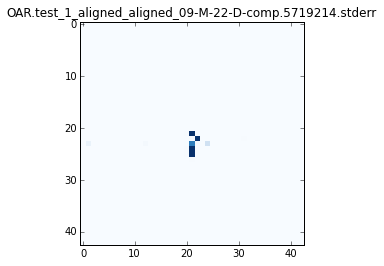

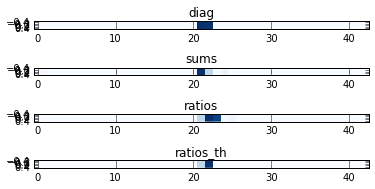

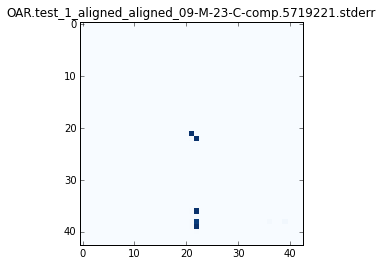

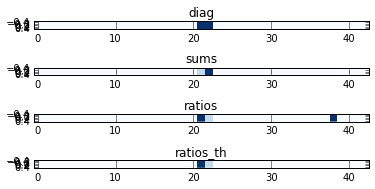

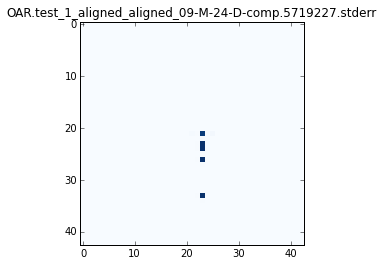

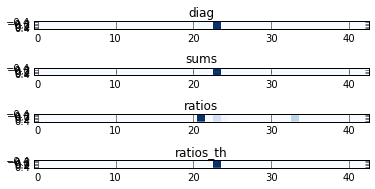

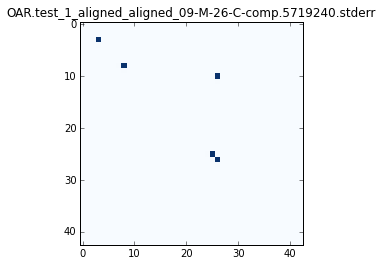

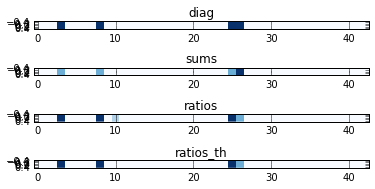

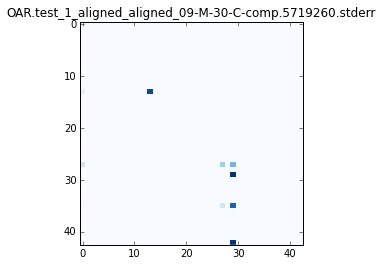

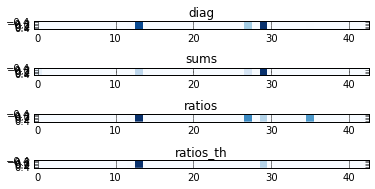

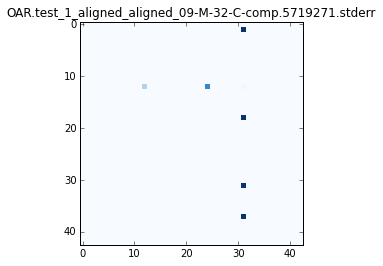

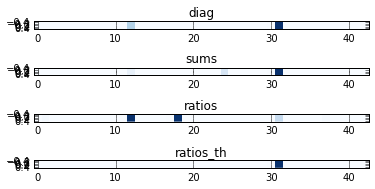

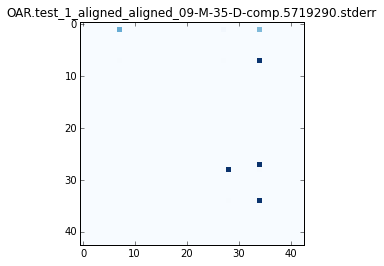

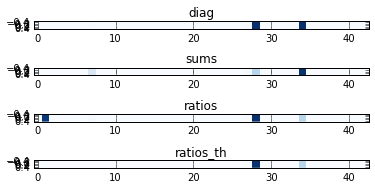

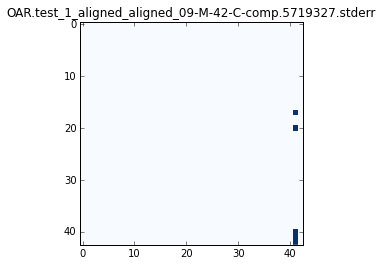

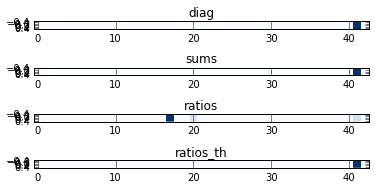

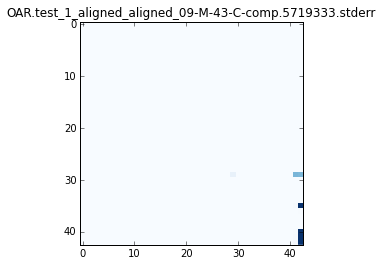

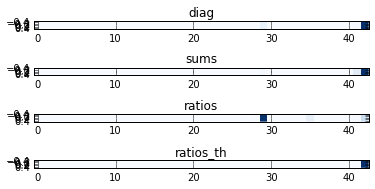

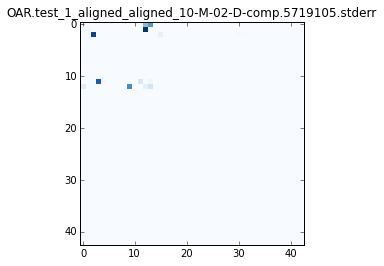

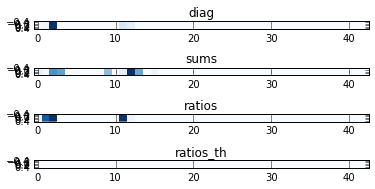

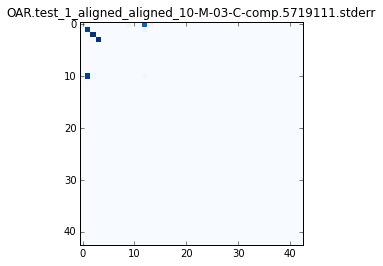

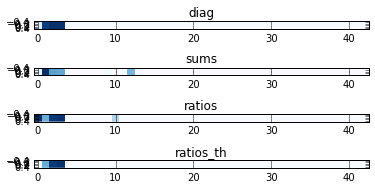

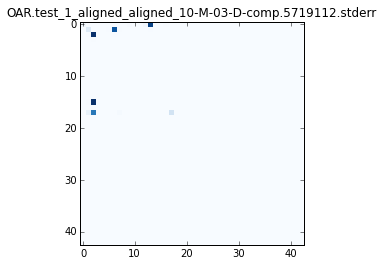

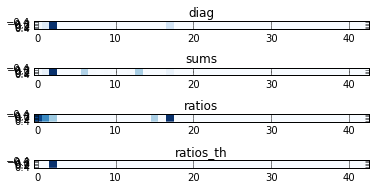

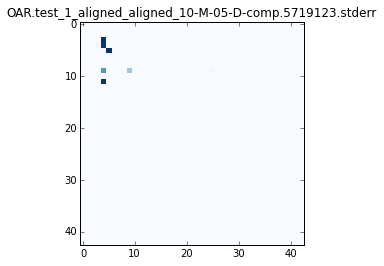

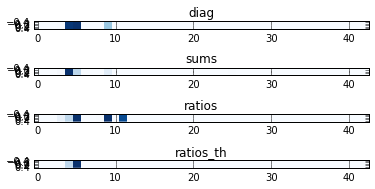

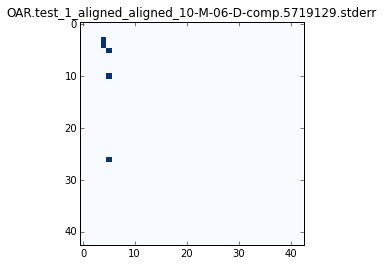

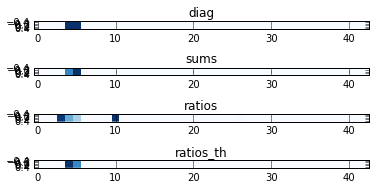

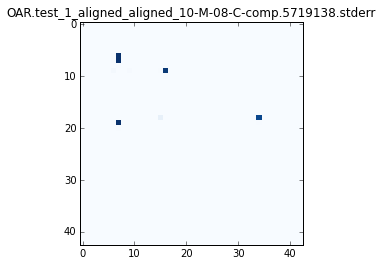

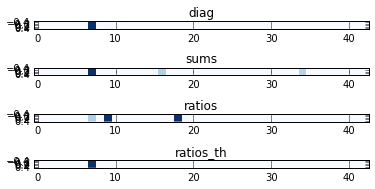

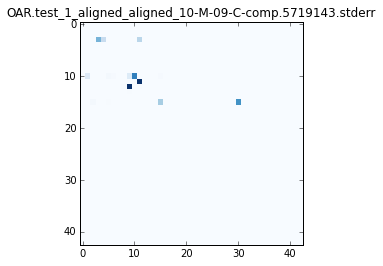

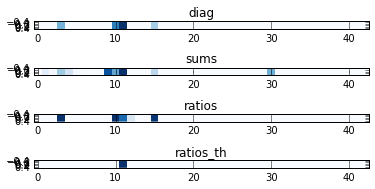

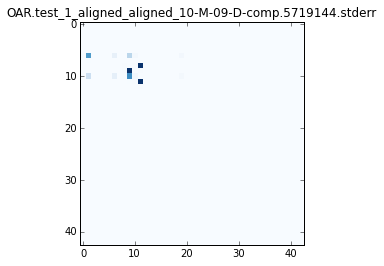

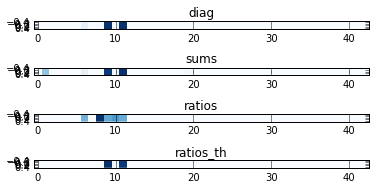

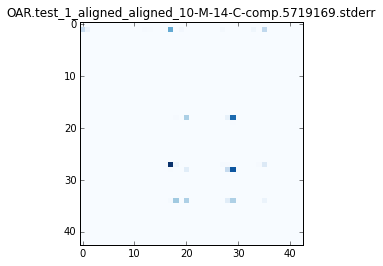

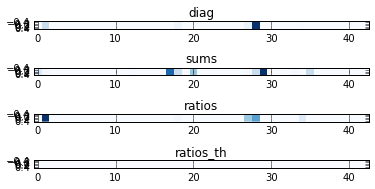

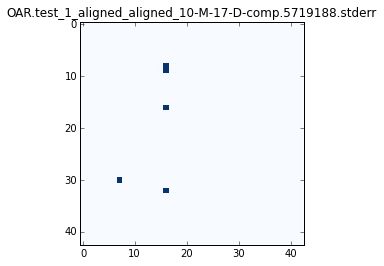

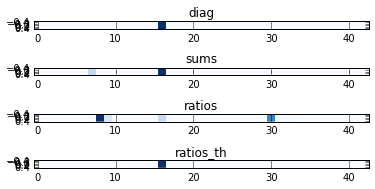

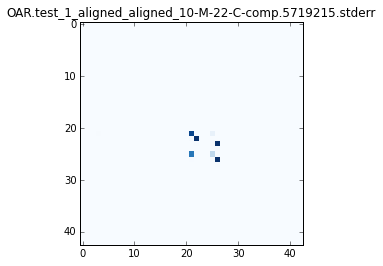

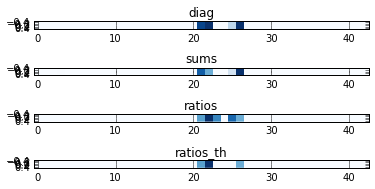

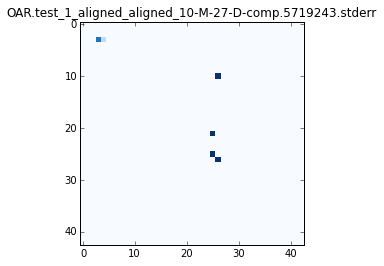

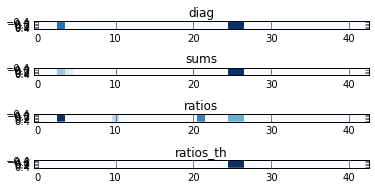

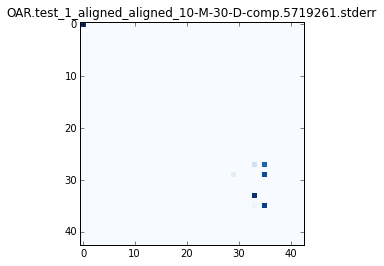

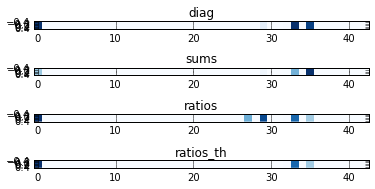

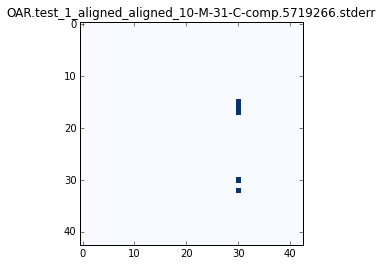

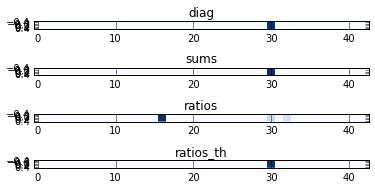

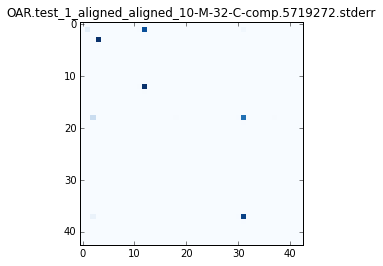

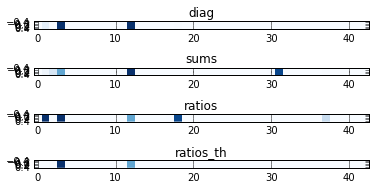

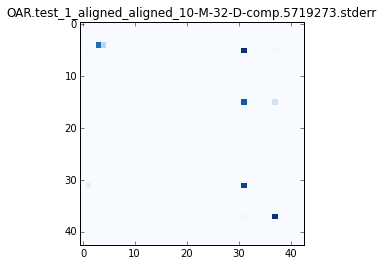

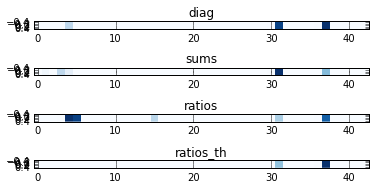

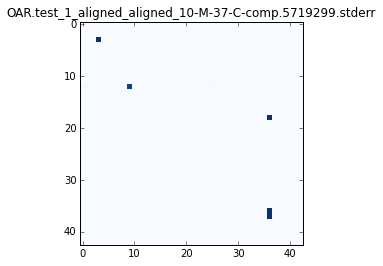

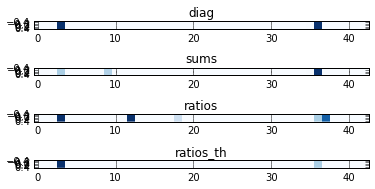

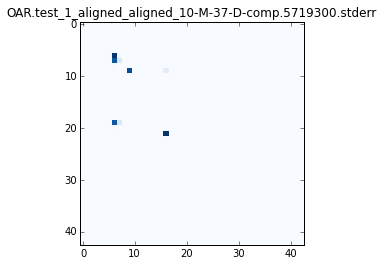

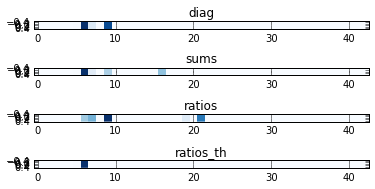

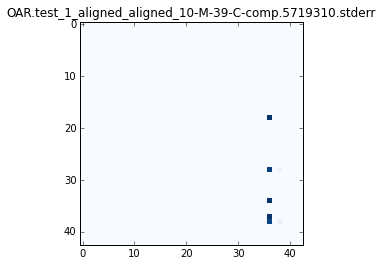

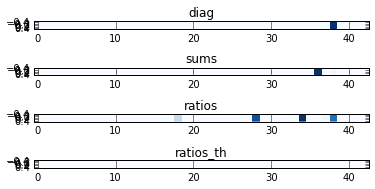

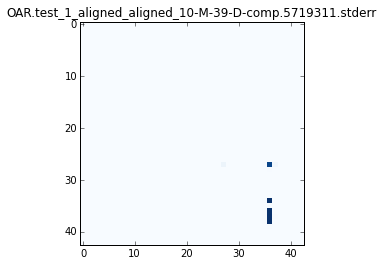

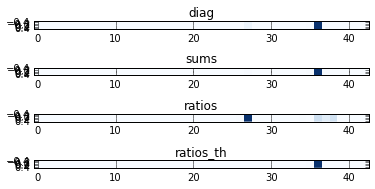

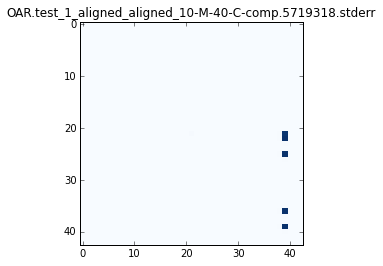

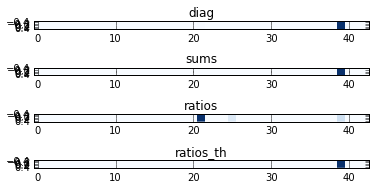

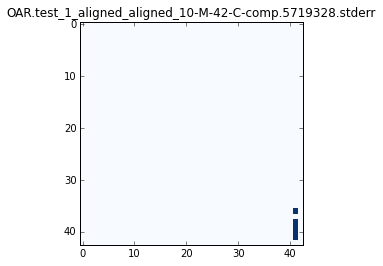

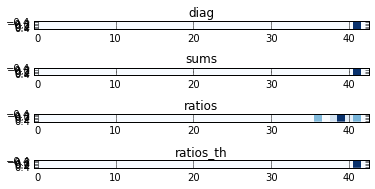

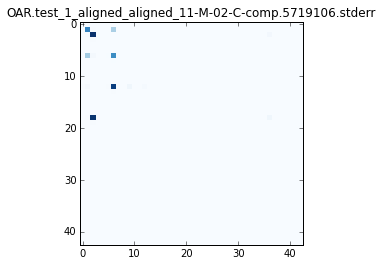

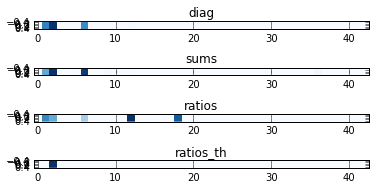

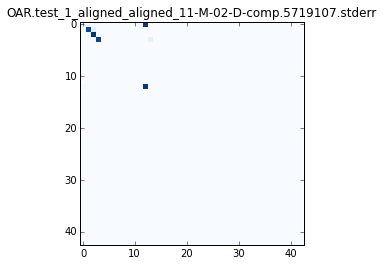

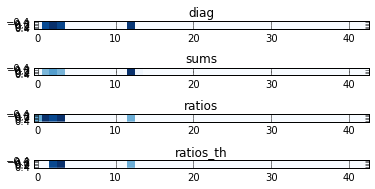

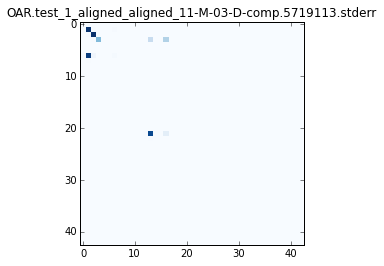

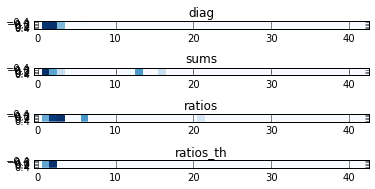

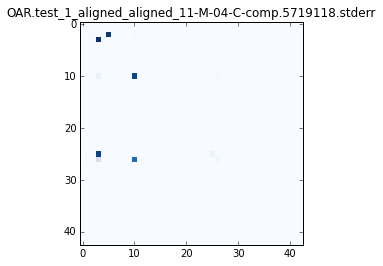

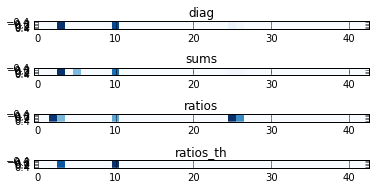

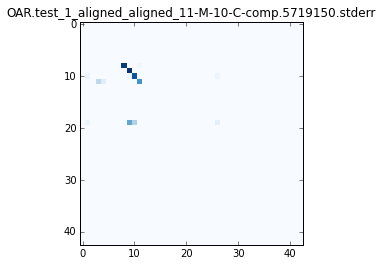

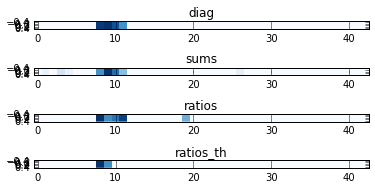

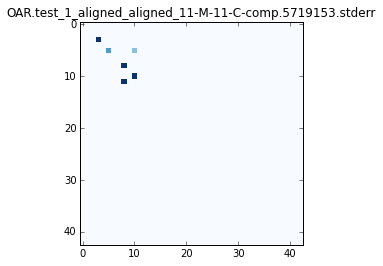

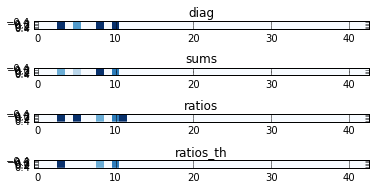

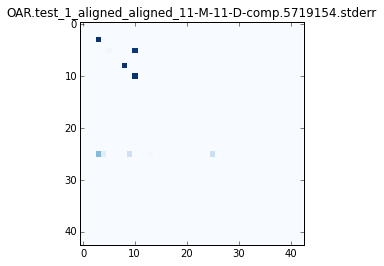

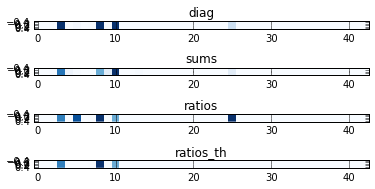

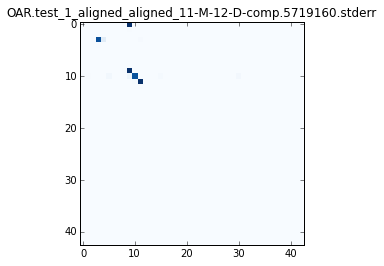

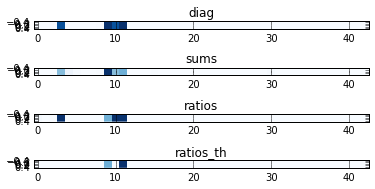

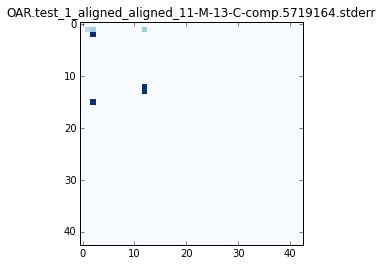

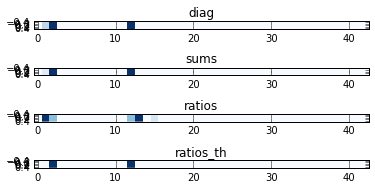

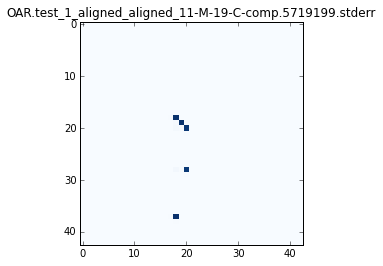

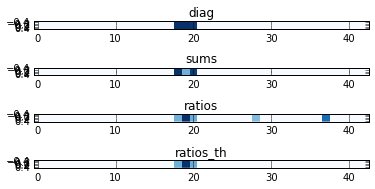

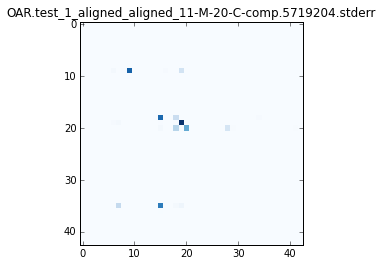

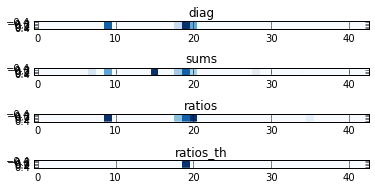

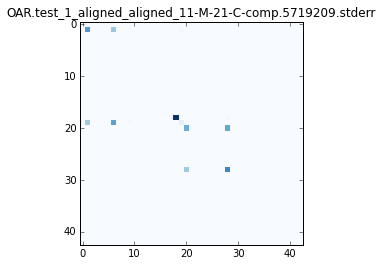

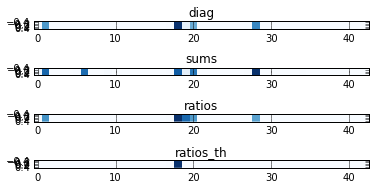

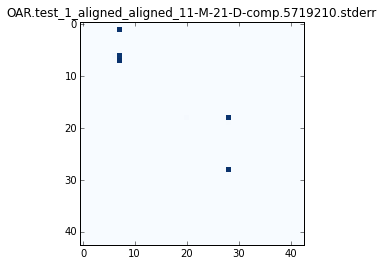

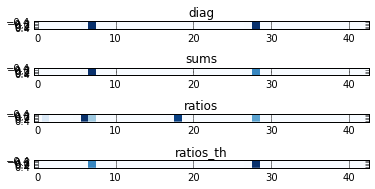

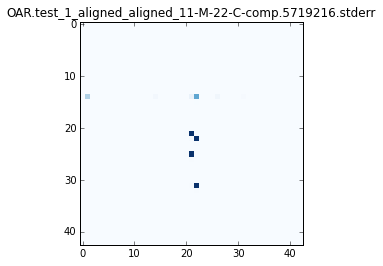

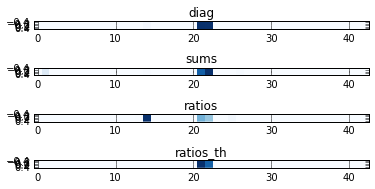

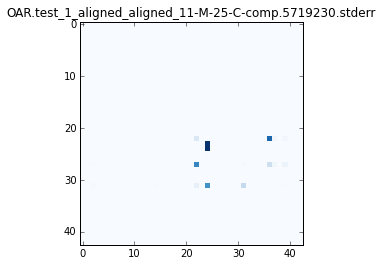

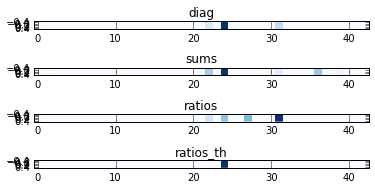

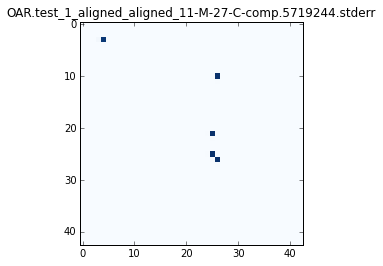

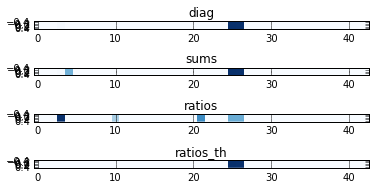

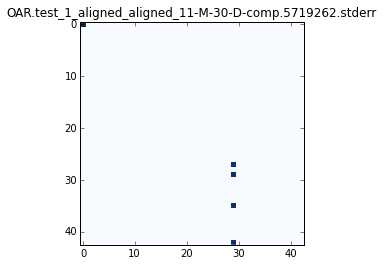

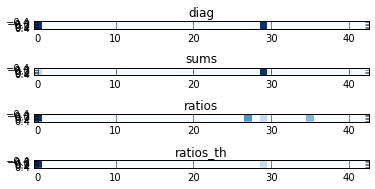

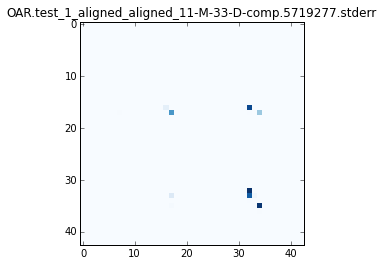

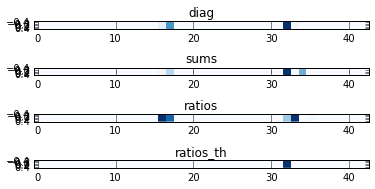

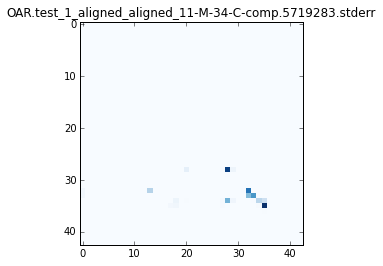

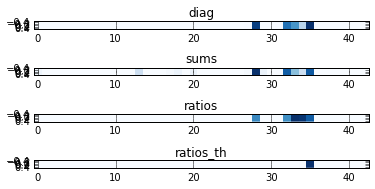

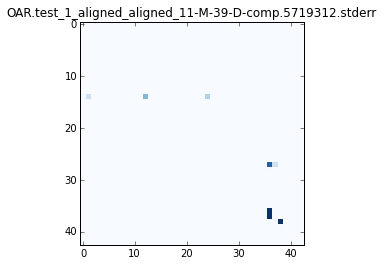

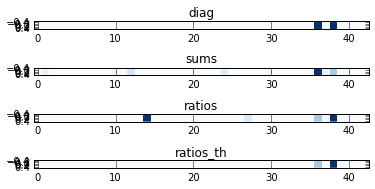

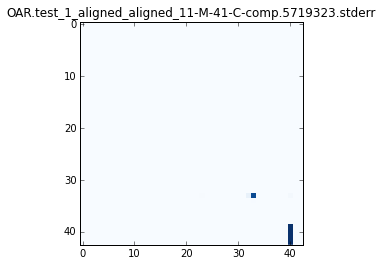

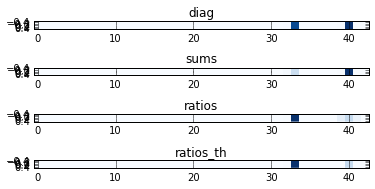

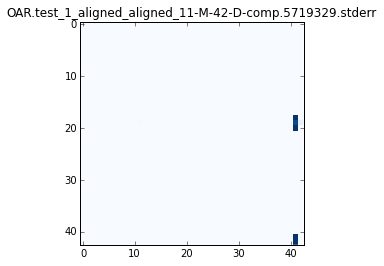

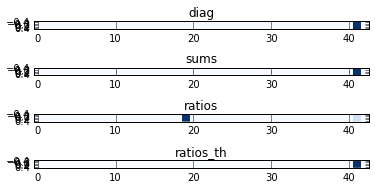

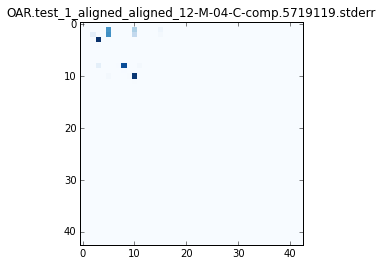

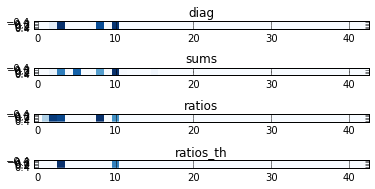

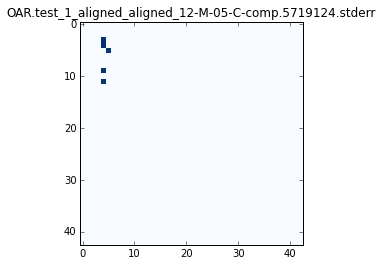

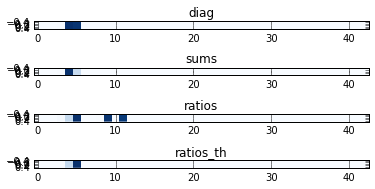

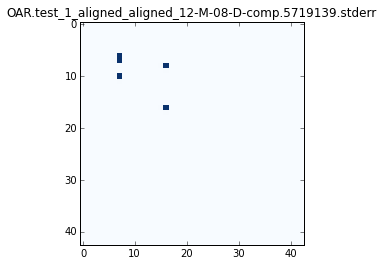

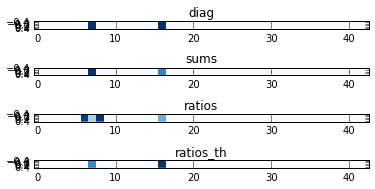

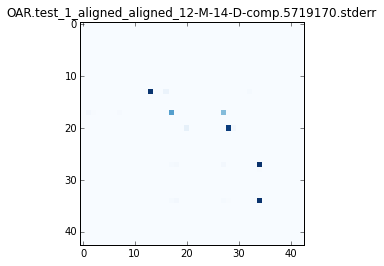

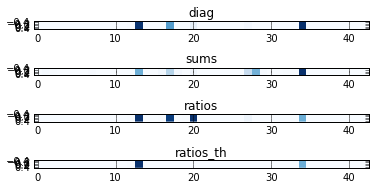

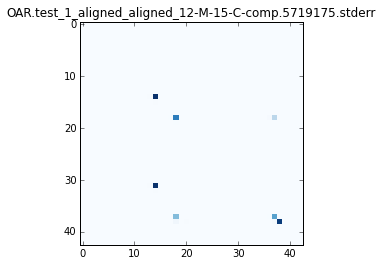

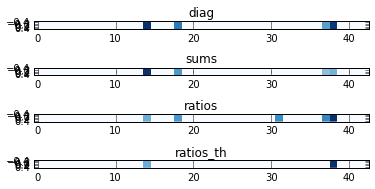

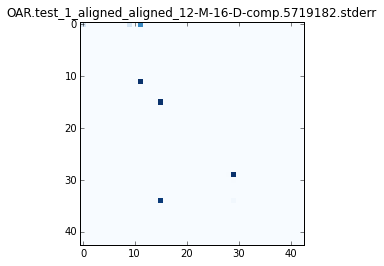

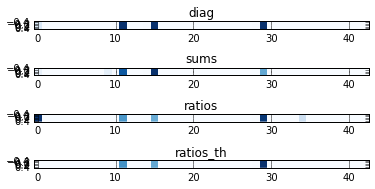

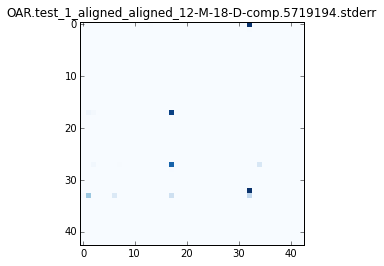

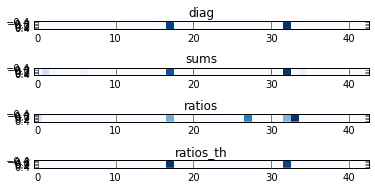

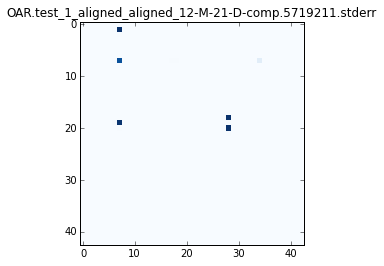

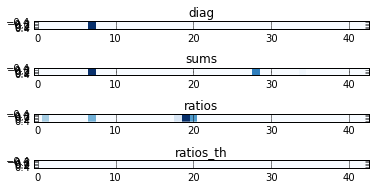

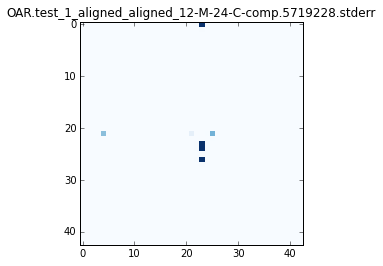

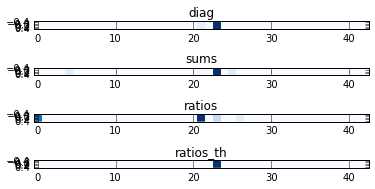

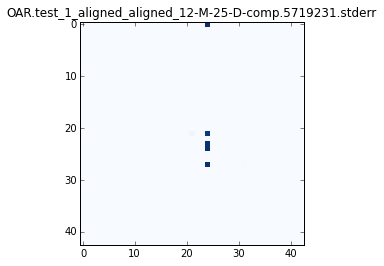

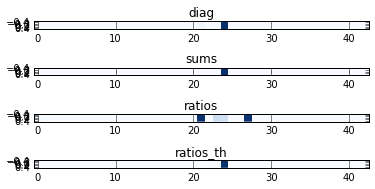

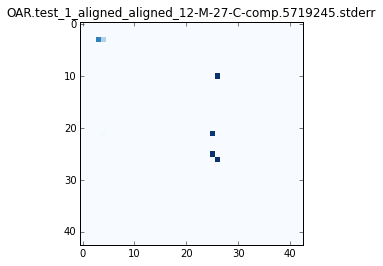

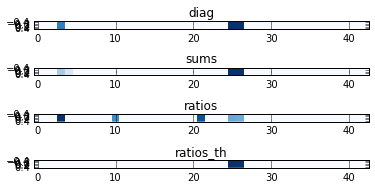

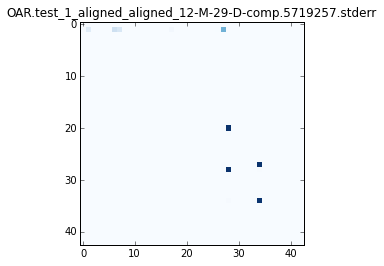

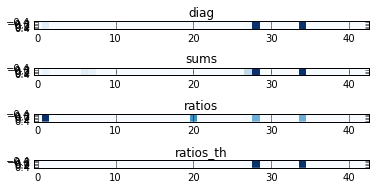

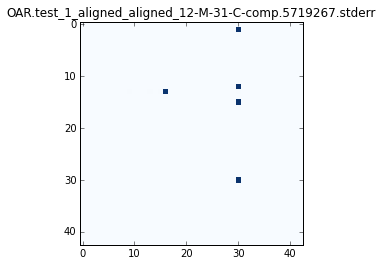

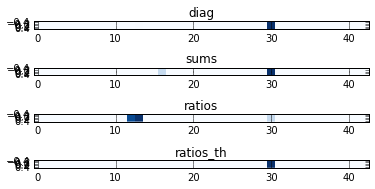

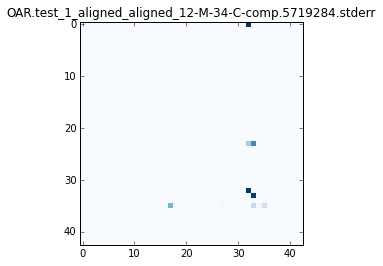

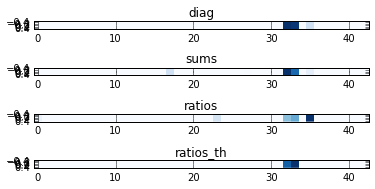

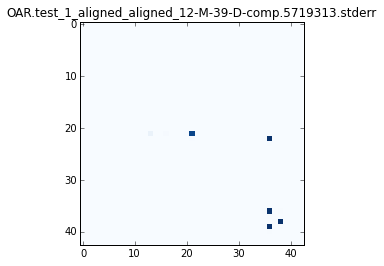

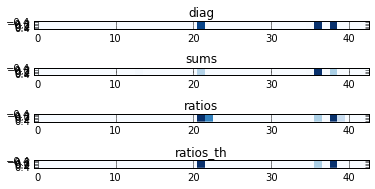

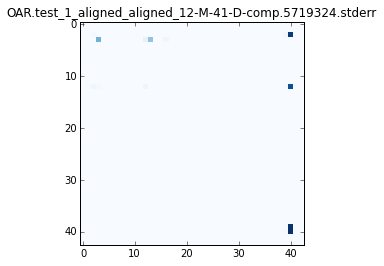

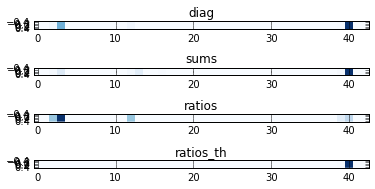

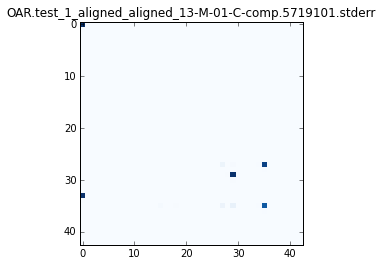

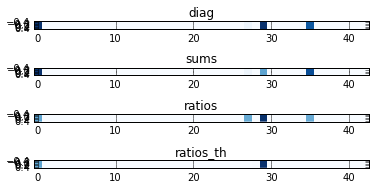

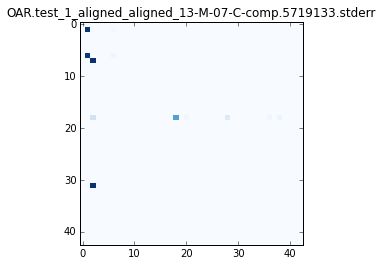

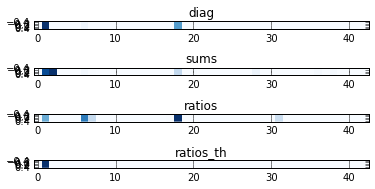

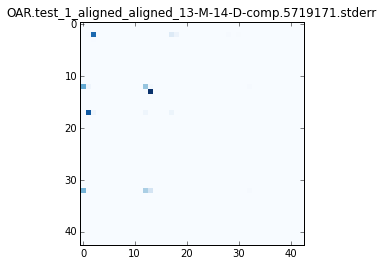

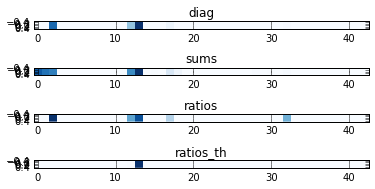

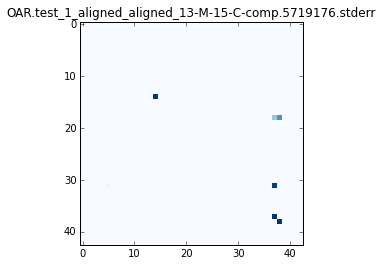

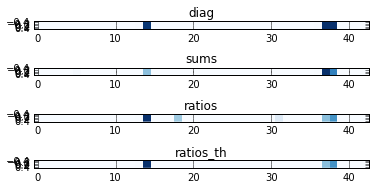

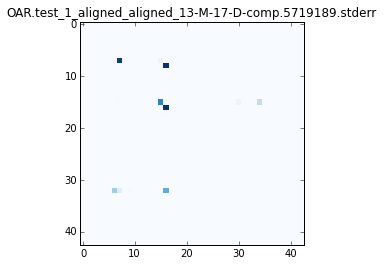

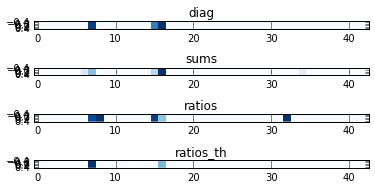

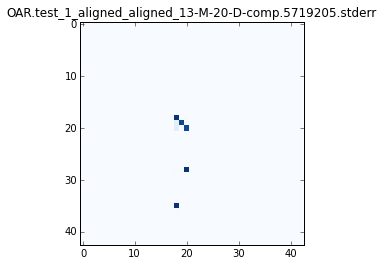

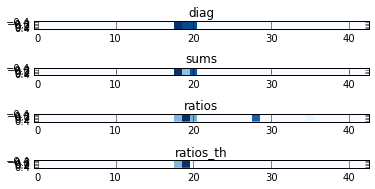

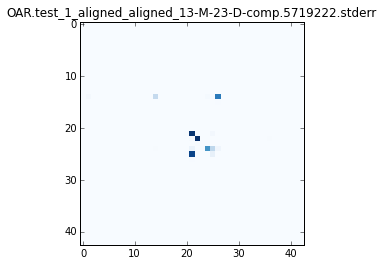

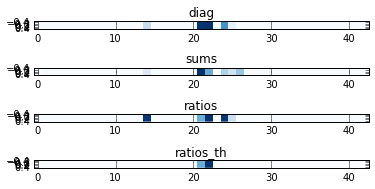

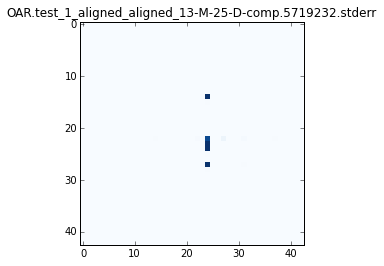

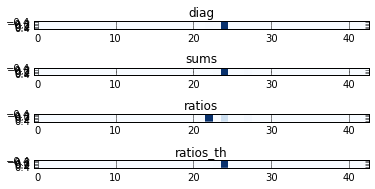

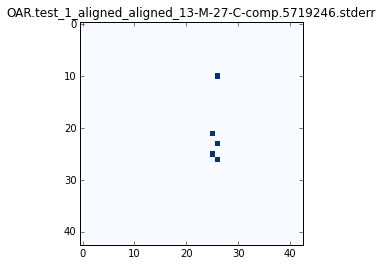

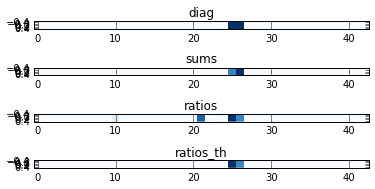

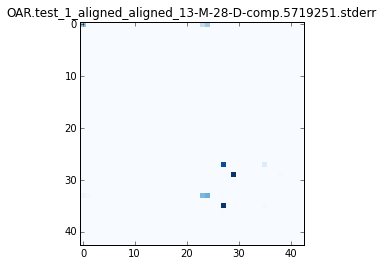

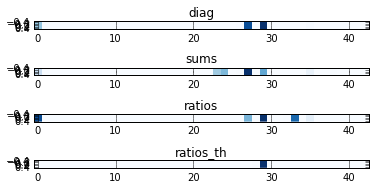

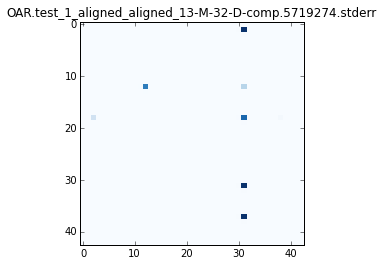

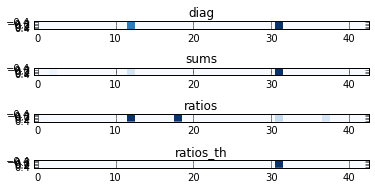

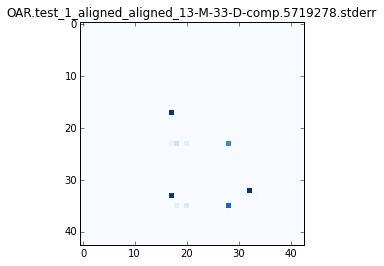

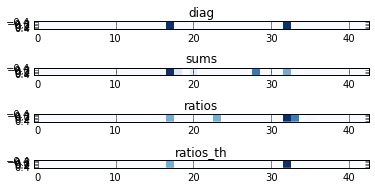

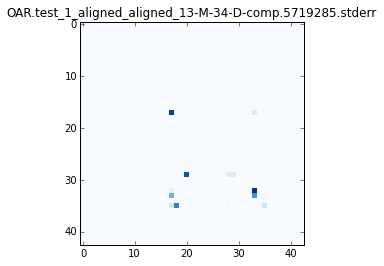

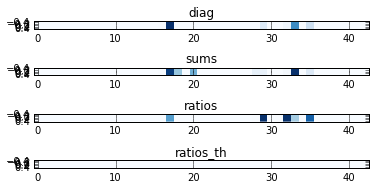

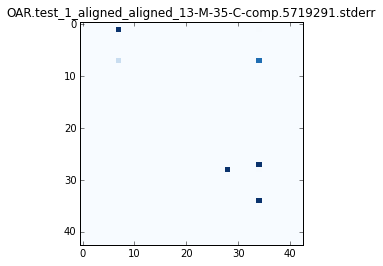

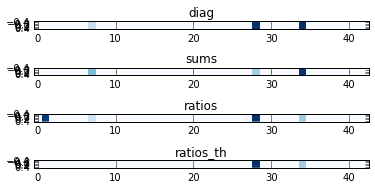

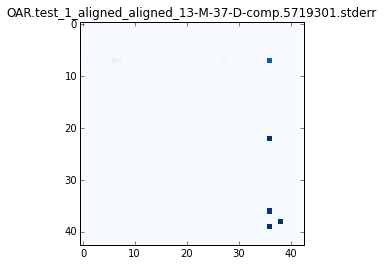

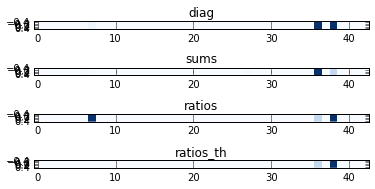

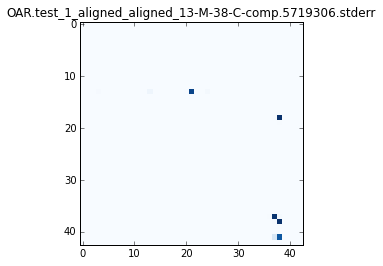

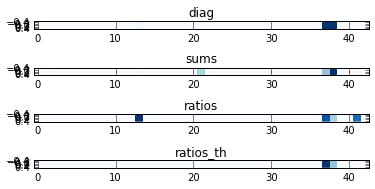

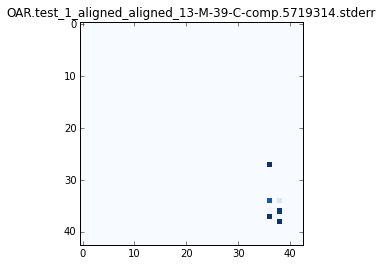

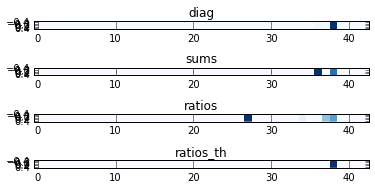

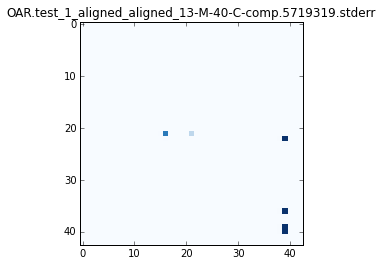

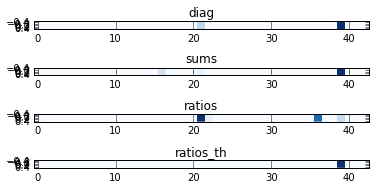

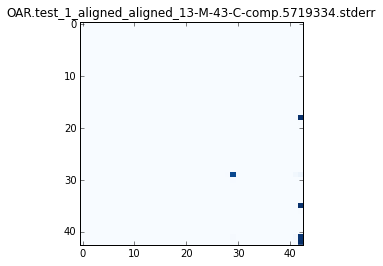

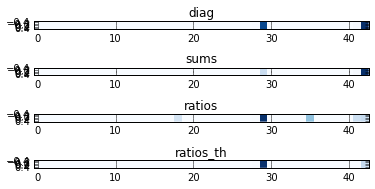

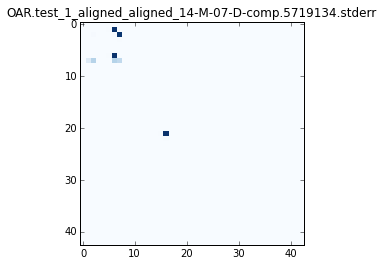

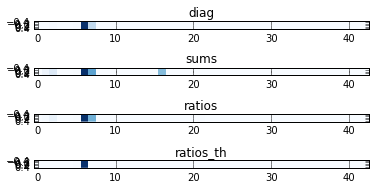

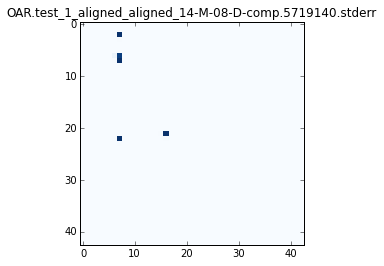

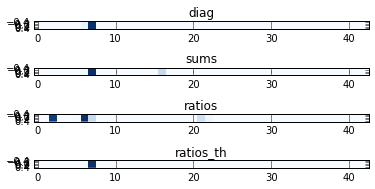

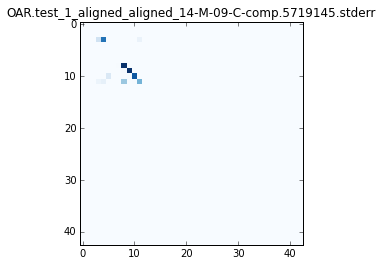

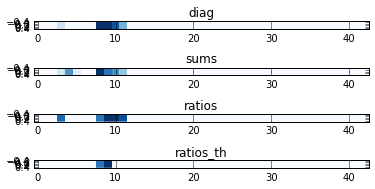

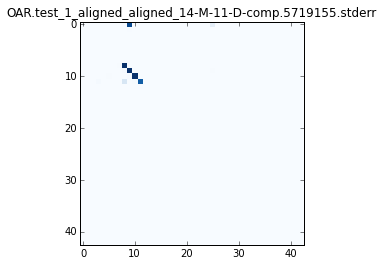

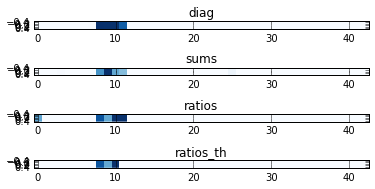

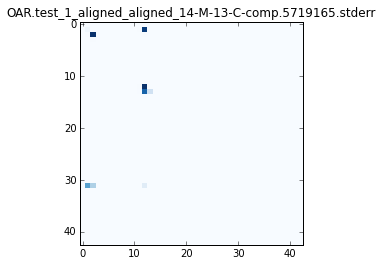

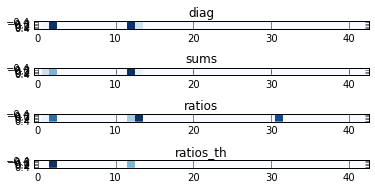

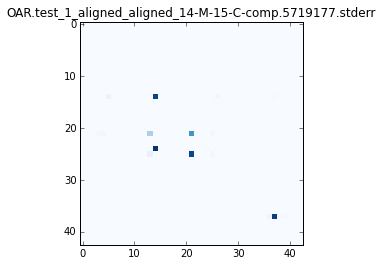

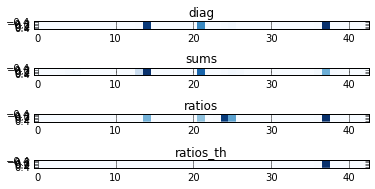

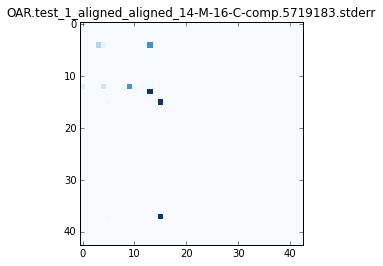

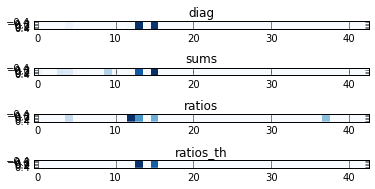

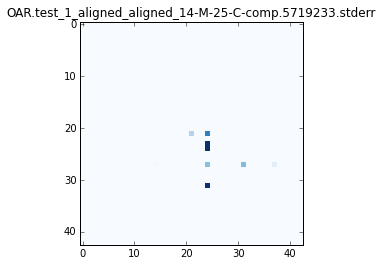

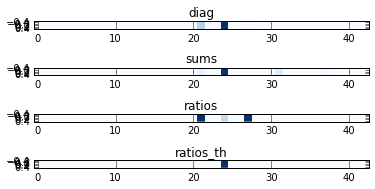

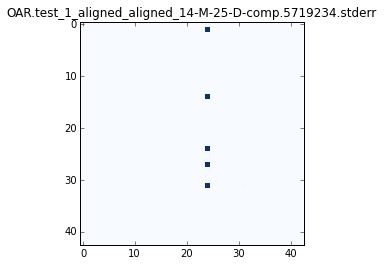

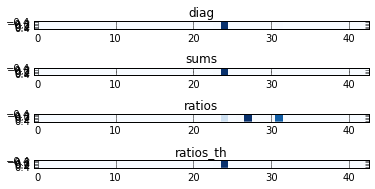

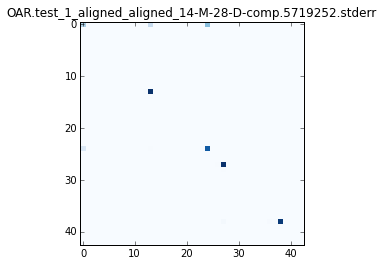

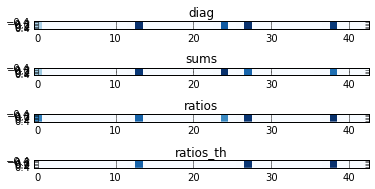

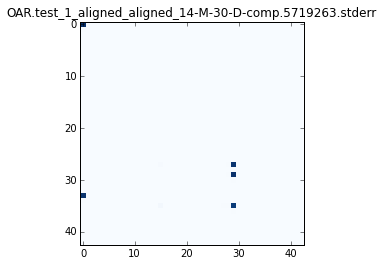

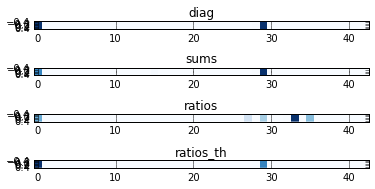

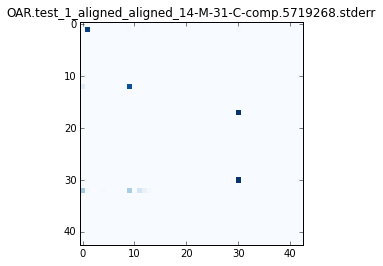

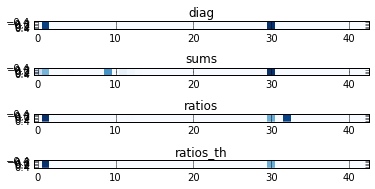

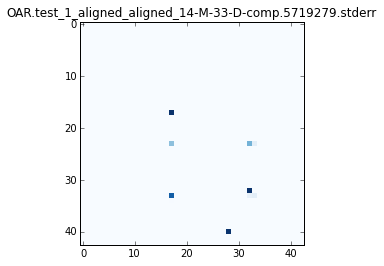

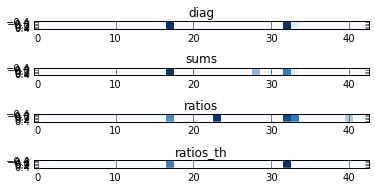

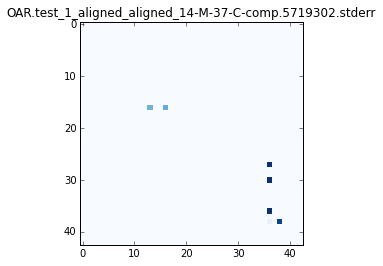

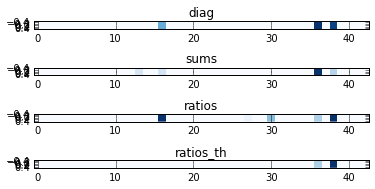

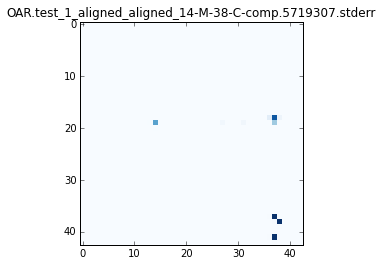

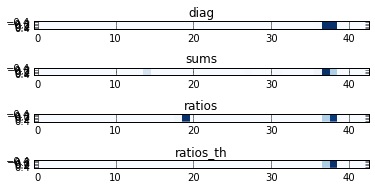

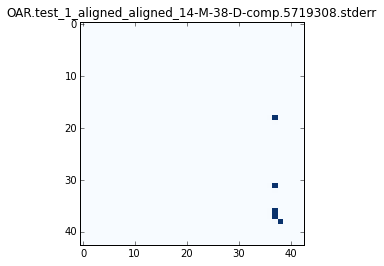

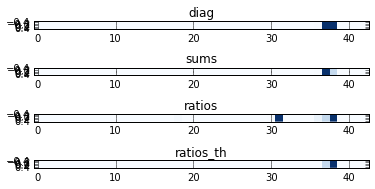

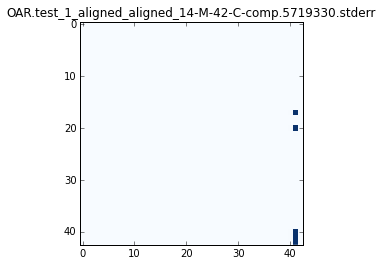

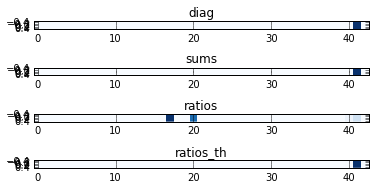

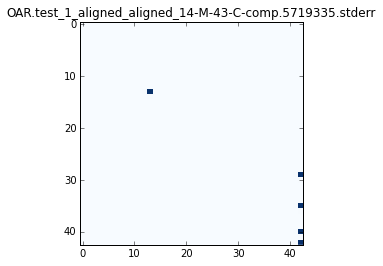

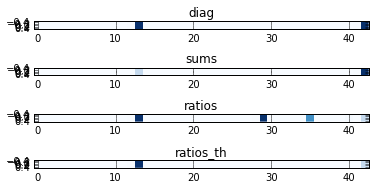

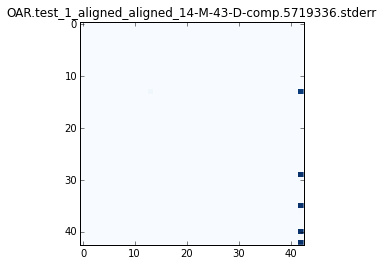

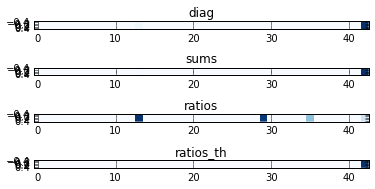

In [9]:

dfs = []
correct = 0
correct_ratios = 0
correct_ratios_th = 0
total = 0
topN_names=select_Top_N(baseline_log,N,test_samples_file)

for log_file in log_files:
    print("Parsing:", log_file)
    m = parse_log(os.path.join(input_folder, log_file))
    if len(m.shape) <= 1:
        continue
    
    if m.shape[0] != m.shape[1]:
        continue
    
   # for i in (range(len(m))):
    #    mult=np.array(43)
     #   for i in
      #  line=m[i]
    #TODO take name
    name=log_file.split("_")[-1].split(".")[0]
    correct_class = int(log_file.split('-')[2])
    topN=topN_names[name]
    print("TOPN: ",topN)
    for cl in range(43):
        if cl not in topN:
            #m[cl]=0
    print(m)    
    diag = m.diagonal()
    y_pred = np.argmax(diag)
    
    predicted_class = y_pred + 1
    
    
    #print('\tIndex:', y_pred)
    print('\tCorrect class: ', correct_class)
    print('\tPredicted Class:', predicted_class)
    print('Probability:', diag[y_pred])
    #print('Diagonal: ', diag)

    total += 1
    if correct_class == predicted_class:
        correct += 1
    
    sums = np.apply_along_axis(np.sum, 0, m)
    ratios = diag / sums
    ratios_th = ratios.copy()
    ratios_th[diag < threshold] = 0
    y_pred = np.argmax(ratios_th)

    max_ratios = np.argmax(ratios) + 1
    max_ratios_th = np.argmax(ratios_th) + 1
    
    if correct_class == max_ratios:
        correct_ratios += 1
    
    if correct_class == max_ratios_th:
        correct_ratios_th += 1
    
    
    plt.figure()
    plt.title(log_file)
    plt.imshow(m, interpolation='none', cmap='Blues')

    plt.figure()
    plt.subplot(511)
    plt.title("diag")
    plt.imshow(diag.reshape((1, 43)), interpolation='none', cmap='Blues')

    plt.subplot(512)
    plt.title("sums")
    plt.imshow(sums.reshape((1, 43)), interpolation='none', cmap='Blues')

    plt.subplot(513)
    plt.title("ratios")
    plt.imshow(ratios.reshape((1, 43)), interpolation='none', cmap='Blues')

    plt.subplot(514)
    plt.title("ratios_th")
    plt.imshow(ratios_th.reshape((1, 43)),
               interpolation='none', cmap='Blues')
    
#     df = pd.DataFrame(m)
#     dfs.append(df)
total=float(total)
correct=float(correct)
print('Total: ', total)
print('Correct: ', correct)
print('Acc overall: ', correct/total)
print('Acc ratios: ', correct_ratios/total)
print('Acc ratios th: ', correct_ratios_th/total)